In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_data_original = pd.read_csv('test.csv')
train_data_original = pd.read_csv('train.csv')

test_data = test_data_original.copy()
train_data = train_data_original.copy()

In [3]:
train_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [4]:
train_data.shape

(59381, 128)

In [5]:
train_data.columns.values

array(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3',
       'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6',
       'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4',
       'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_1', 'Insurance_History_2',
       'Insurance_History_3', 'Insurance_History_4',
       'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_5', 'Medical_History_6',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_10', '

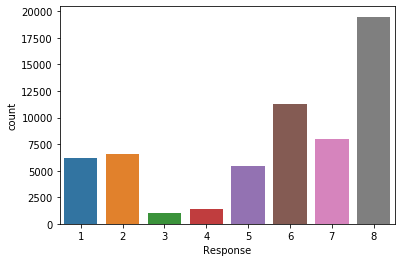

In [6]:
sns.countplot(data=train_data, x='Response')

In [7]:
train_data_old = train_data.copy()

In [8]:
train_data['Response'] = train_data['Response'].apply(lambda x: 0 if x!=8 else 1)

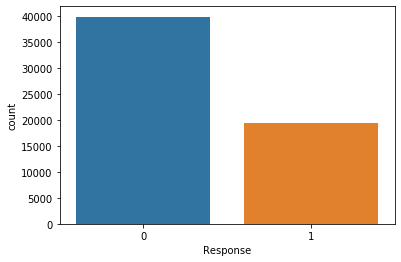

In [9]:
sns.countplot(data=train_data, x='Response')

In [10]:
train_data[['Id', 'Ins_Age', 'Ht', 'Wt', 'BMI' ,'Response']].head()

,Id,Ins_Age,Ht,Wt,BMI,Response
0,2,0.641791,0.581818,0.148536,0.323008,1
1,5,0.059701,0.600000,0.131799,0.272288,0
2,6,0.029851,0.745455,0.288703,0.428780,1
3,7,0.164179,0.672727,0.205021,0.352438,1
4,8,0.417910,0.654545,0.234310,0.424046,1


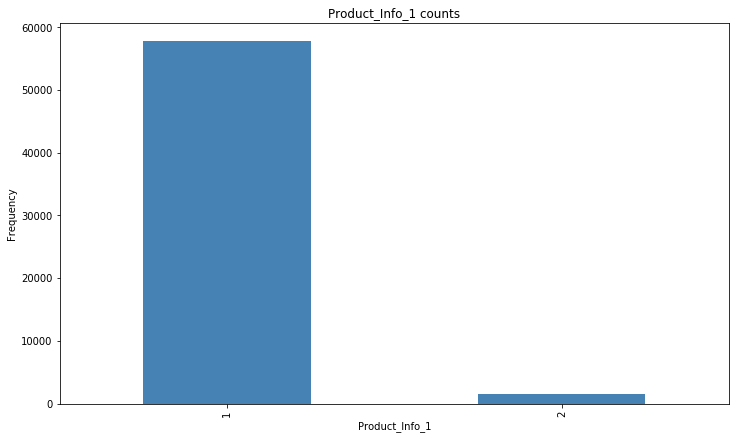

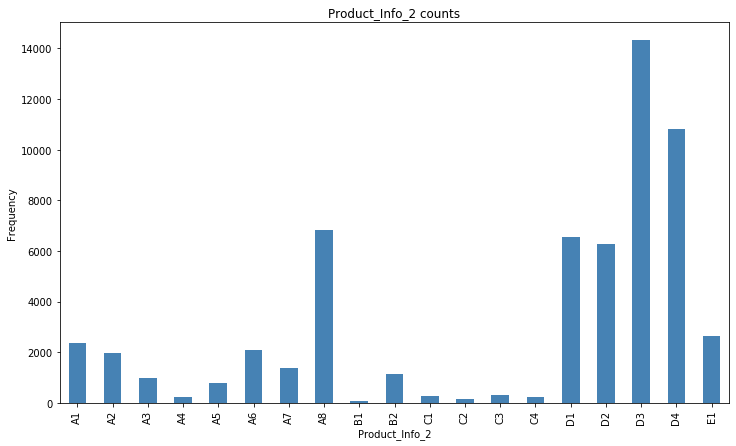

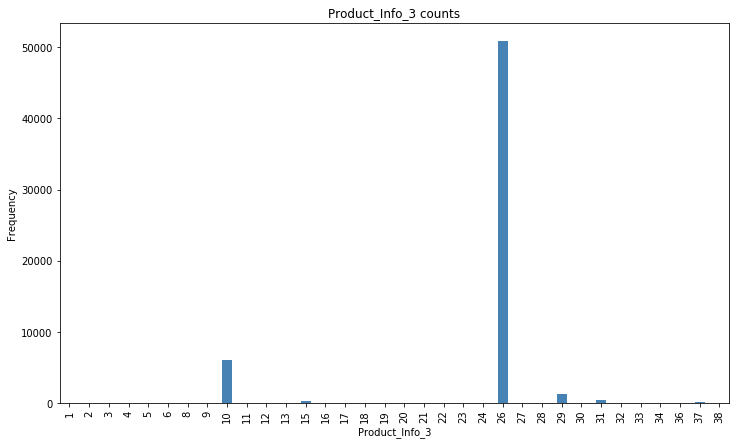

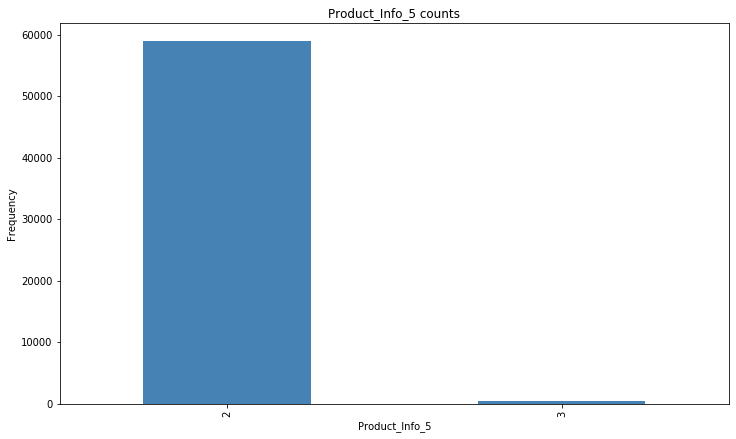

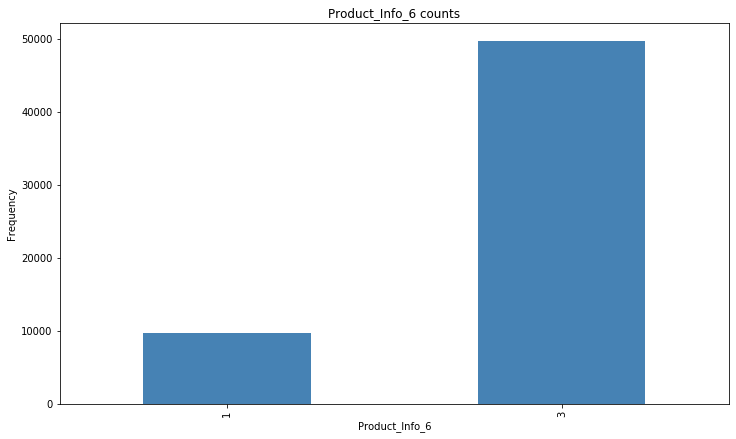

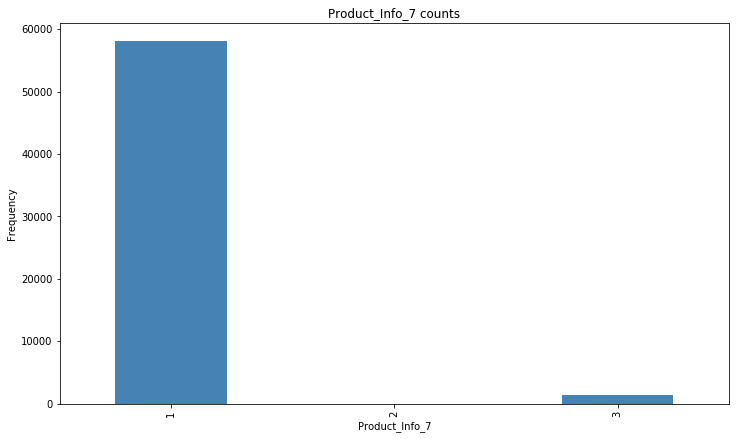

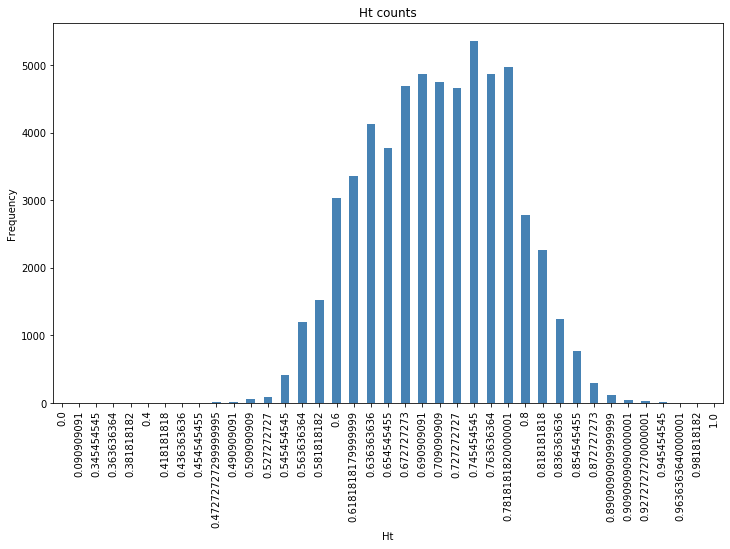

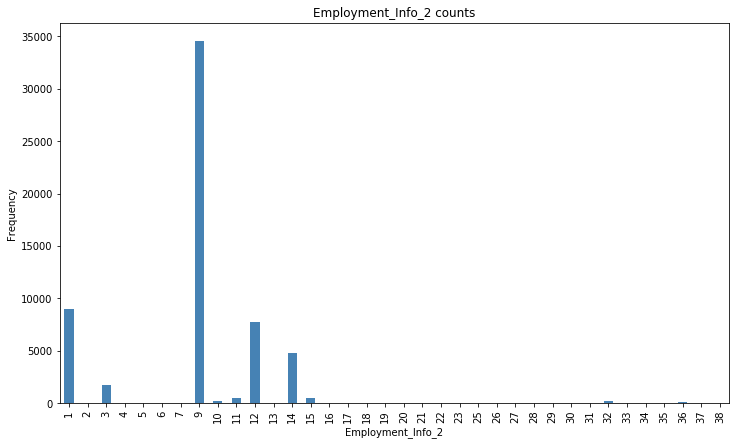

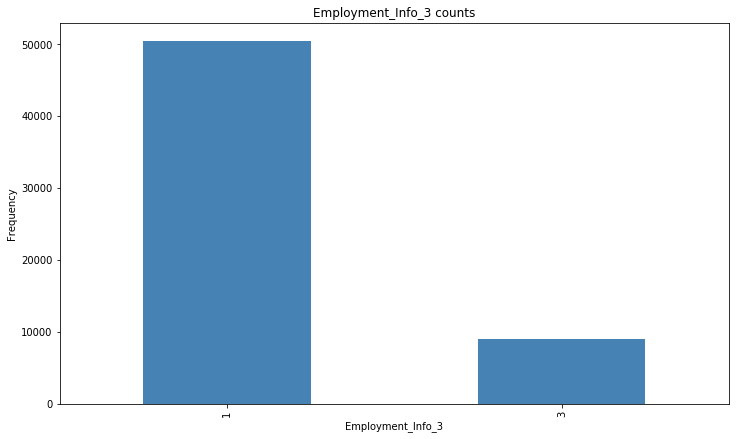

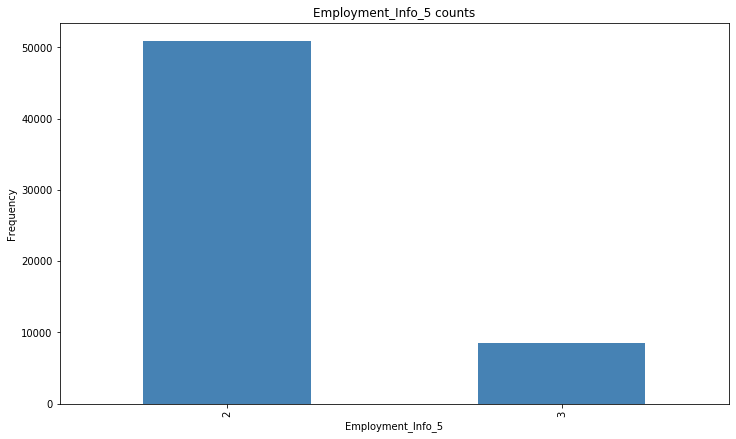

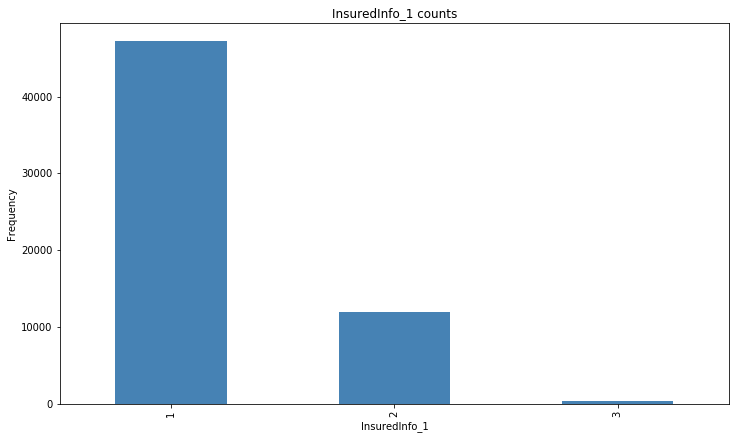

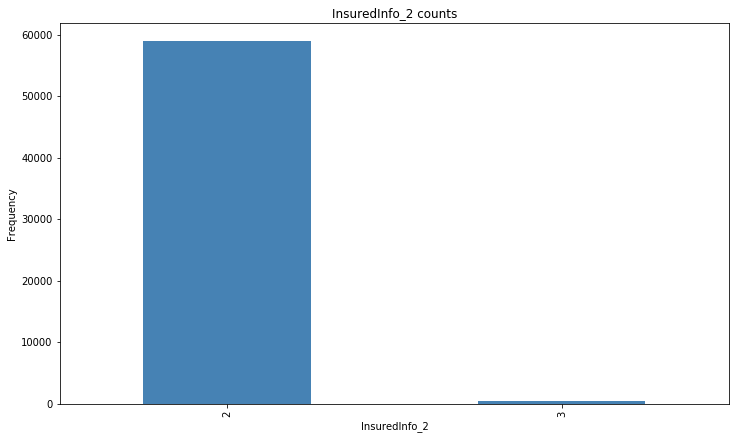

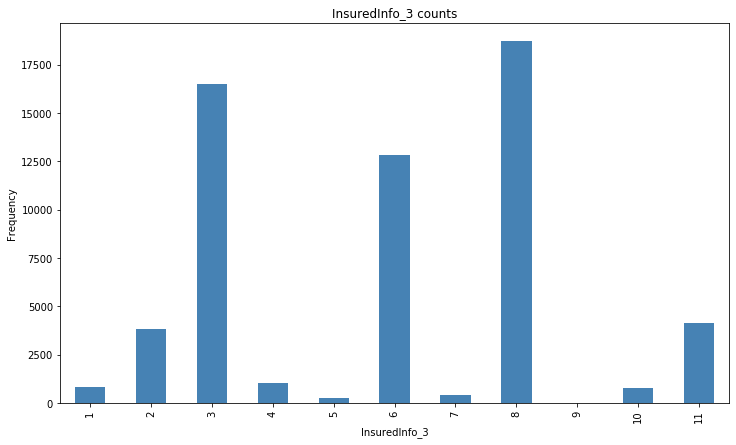

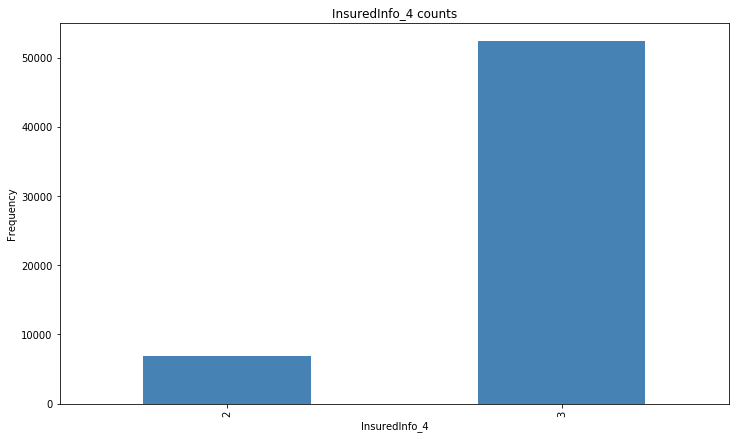

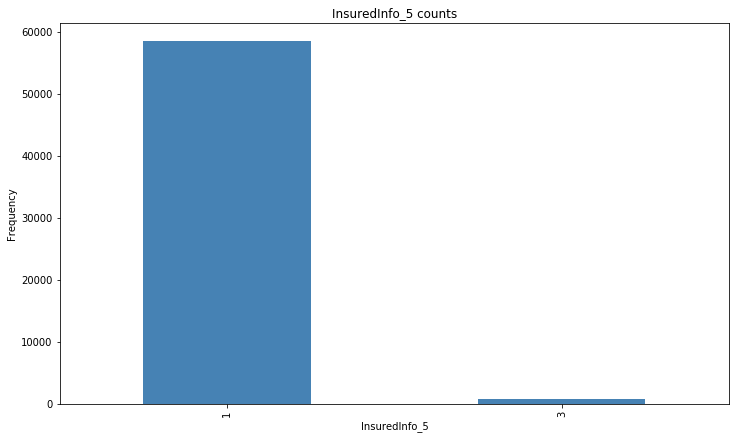

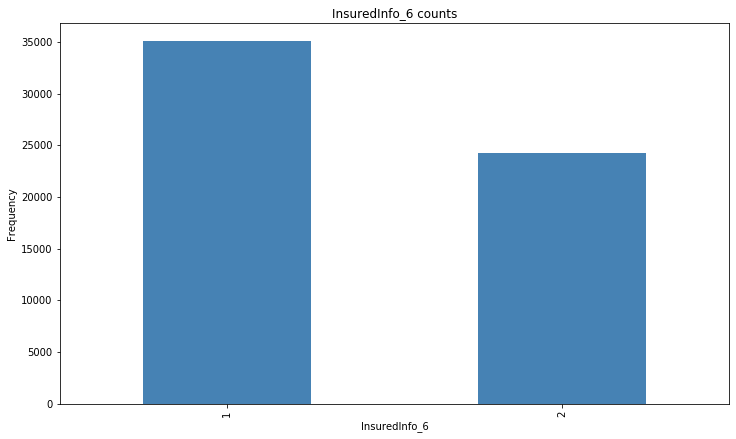

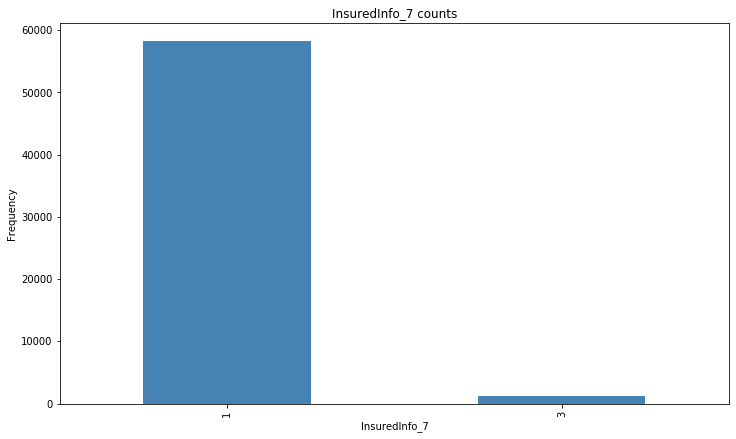

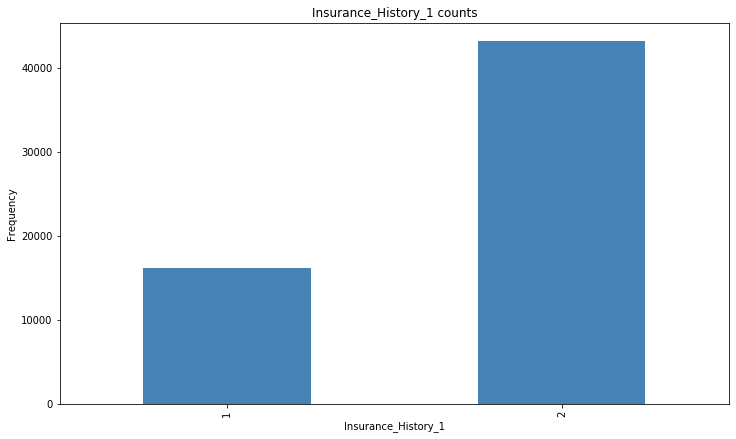

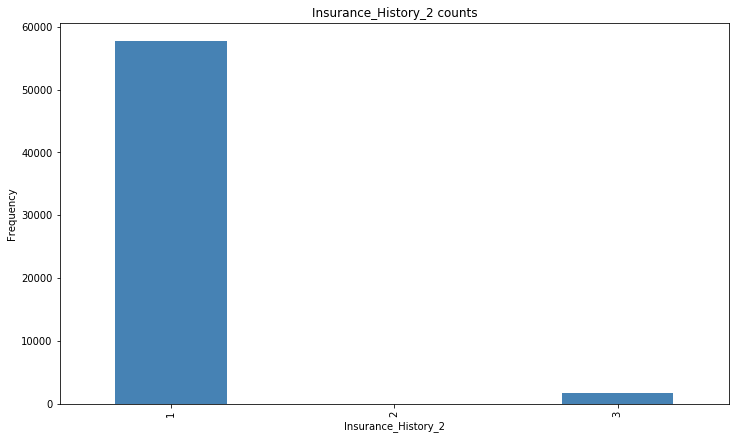

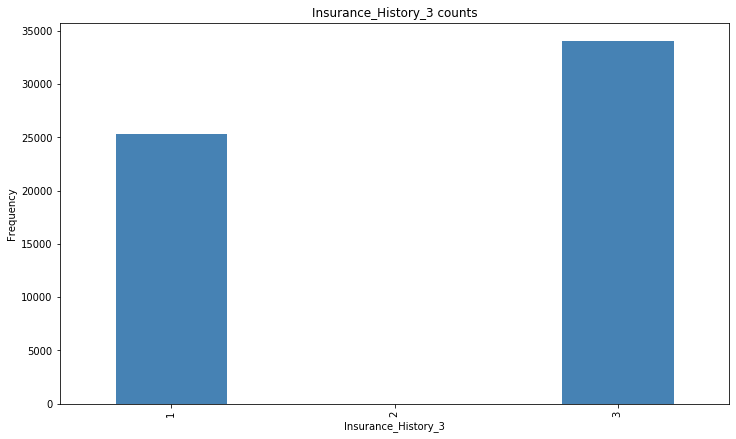

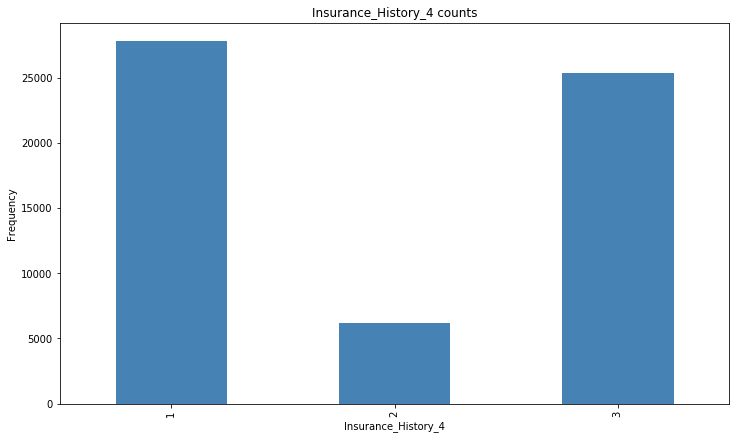

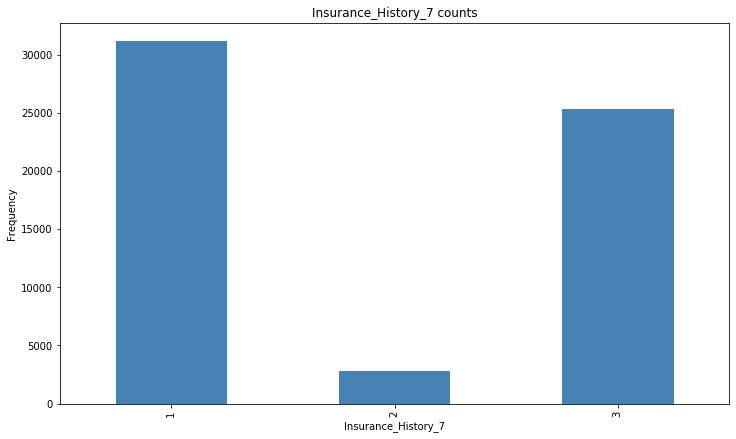

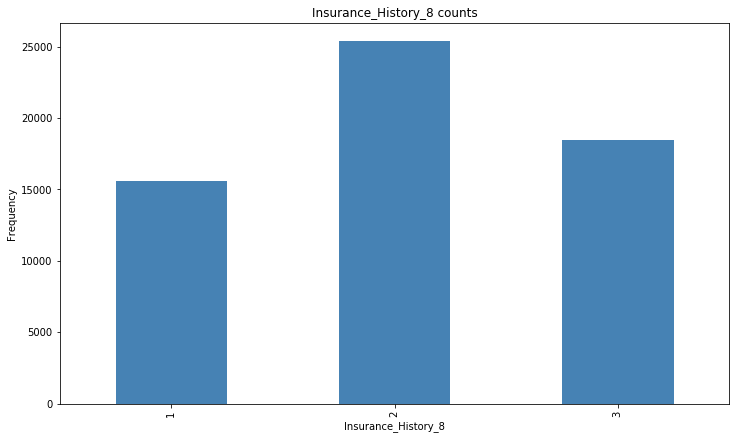

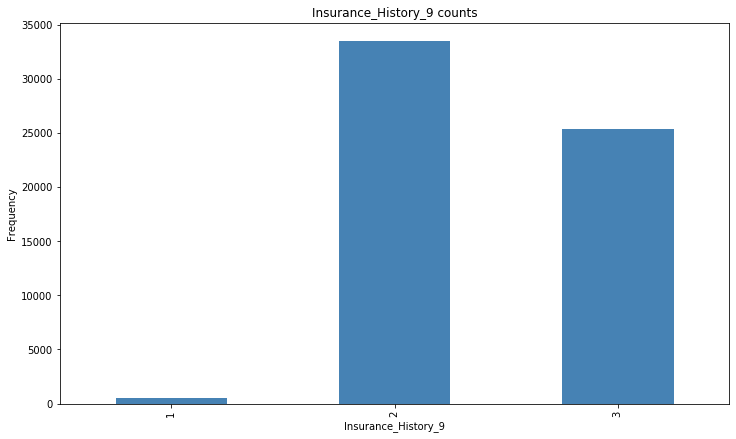

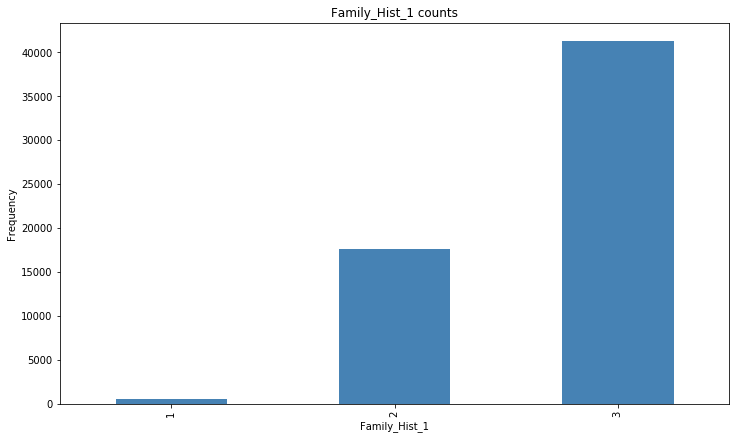

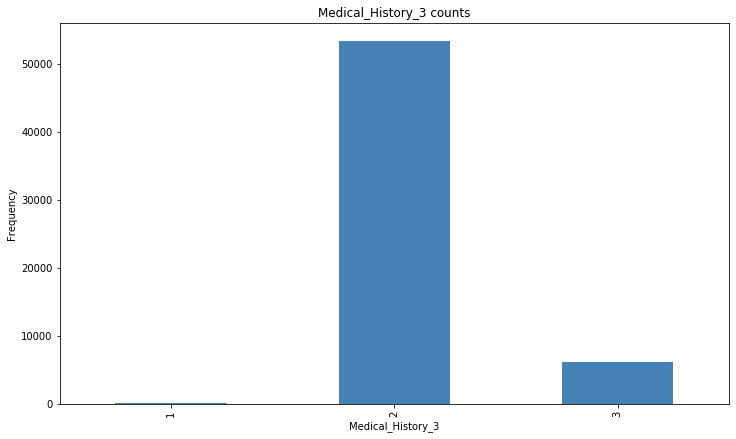

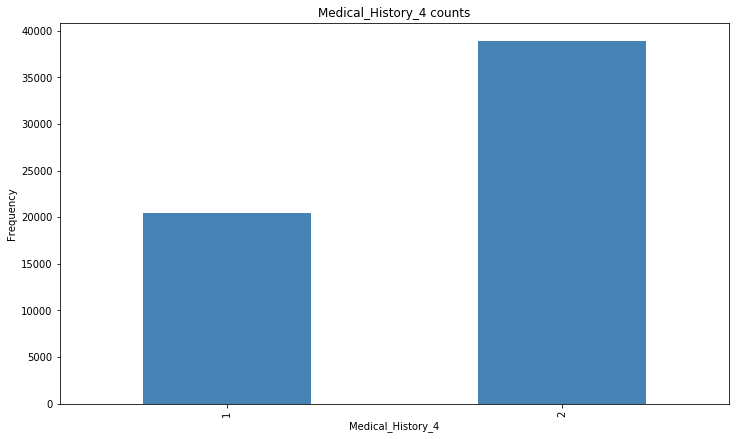

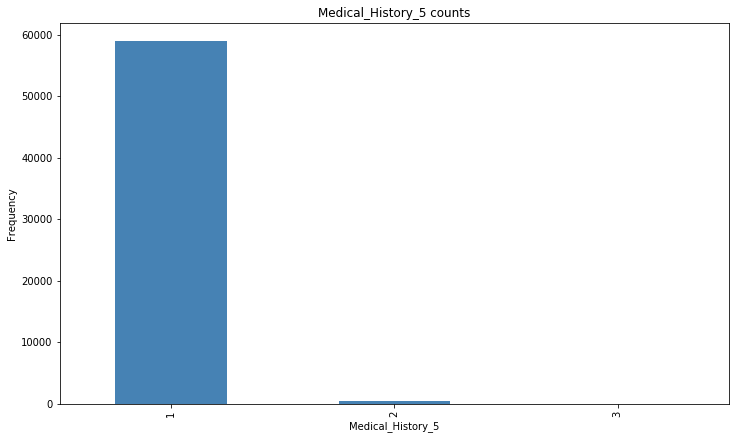

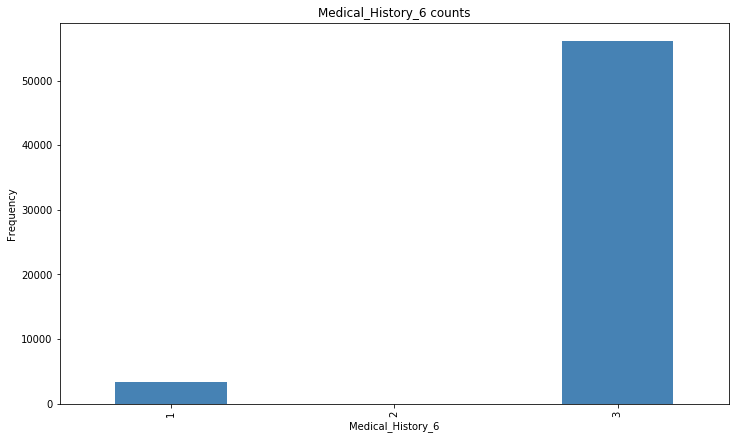

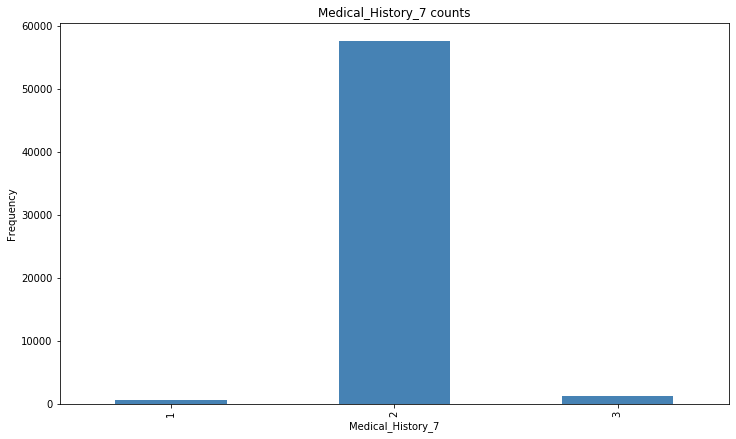

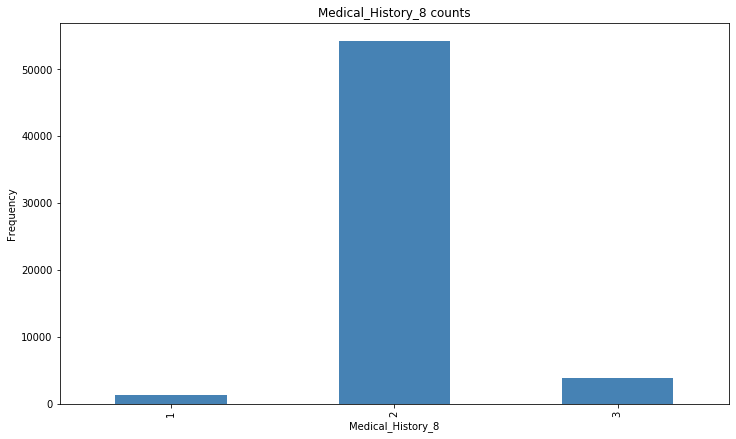

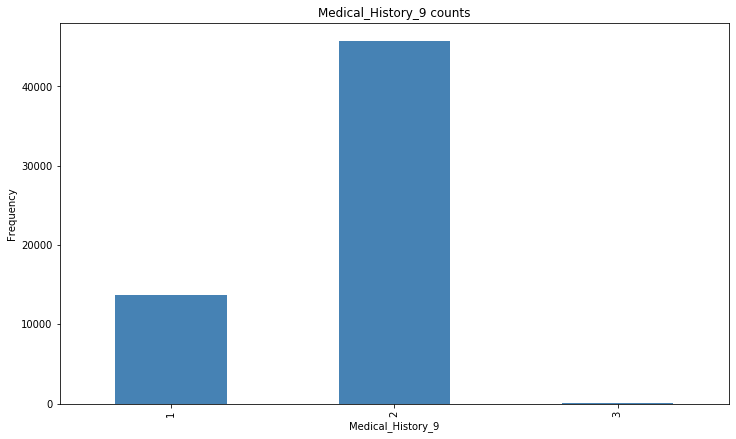

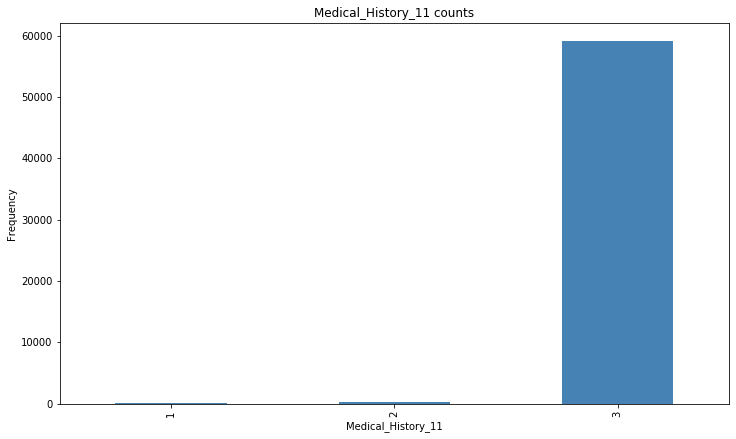

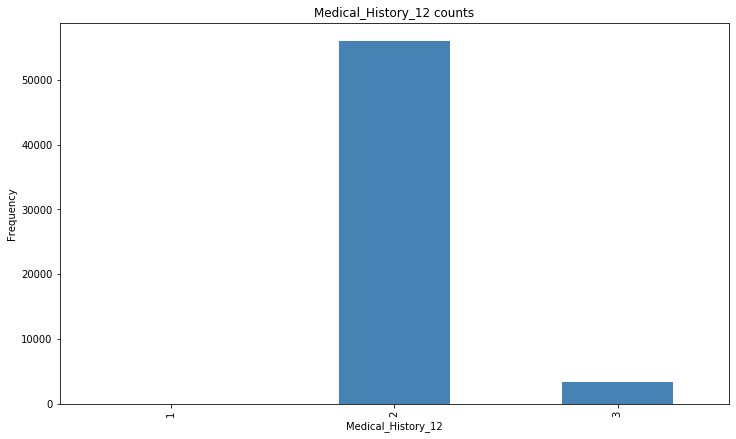

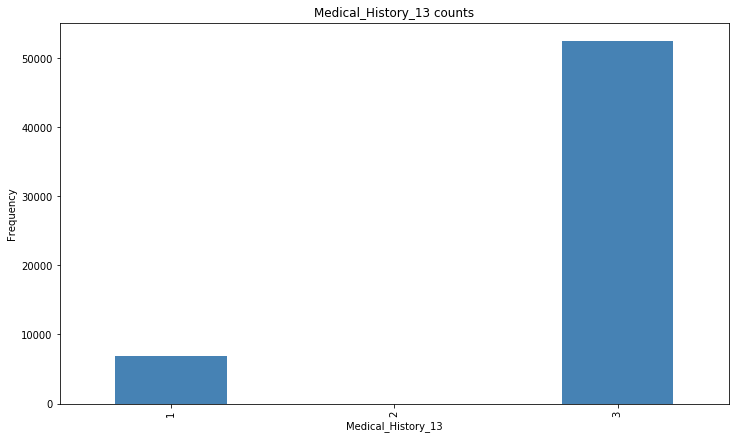

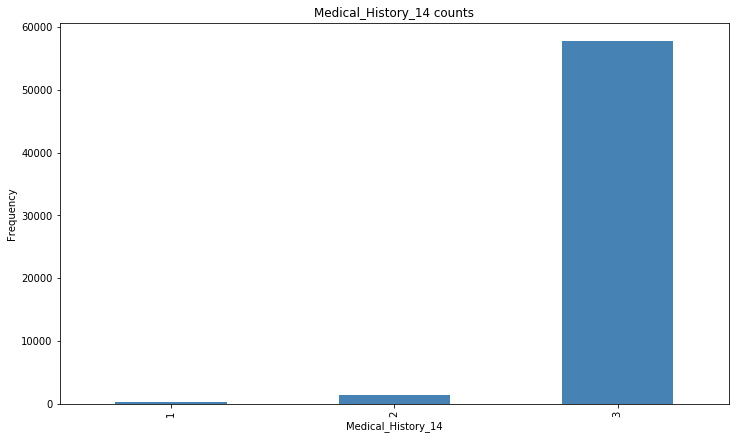

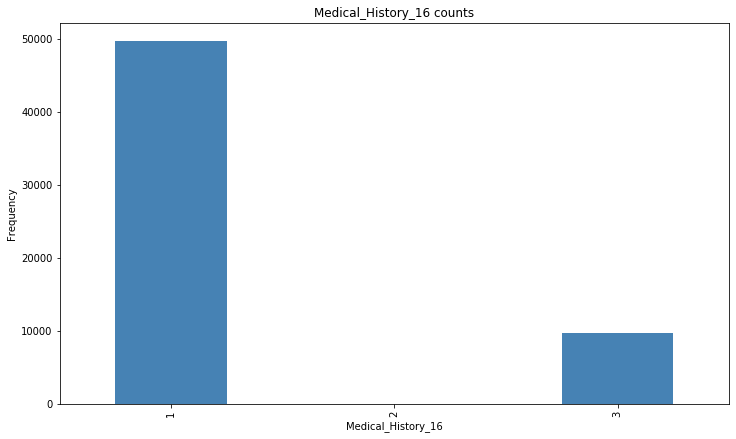

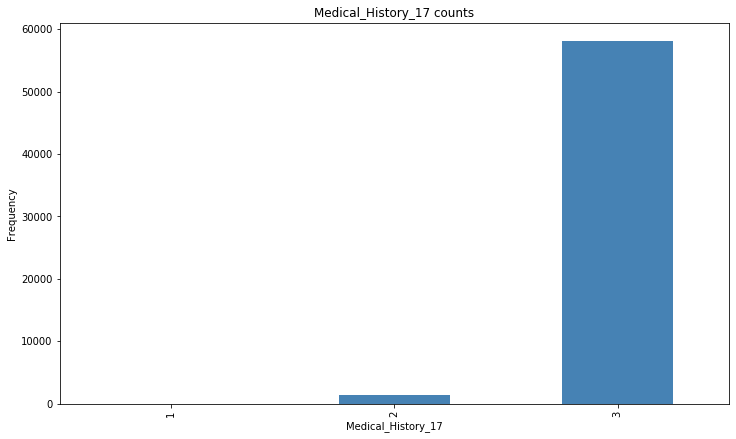

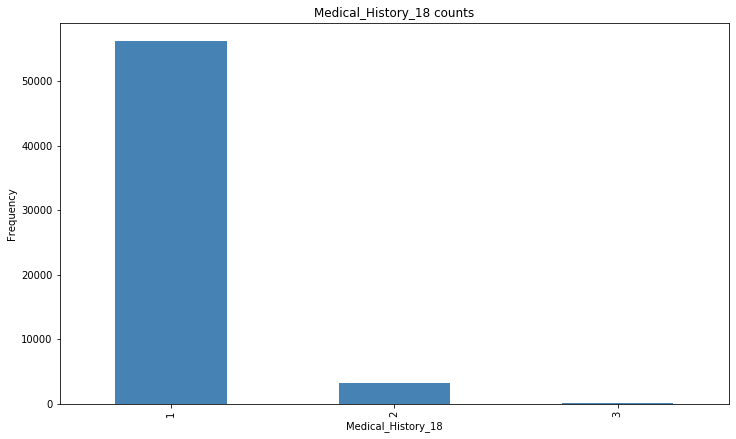

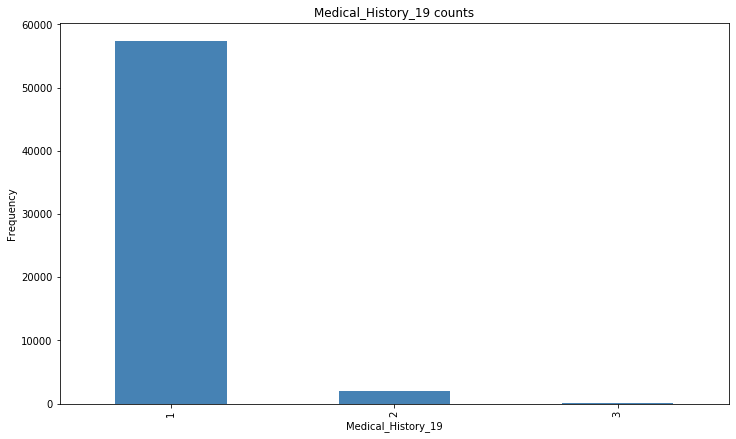

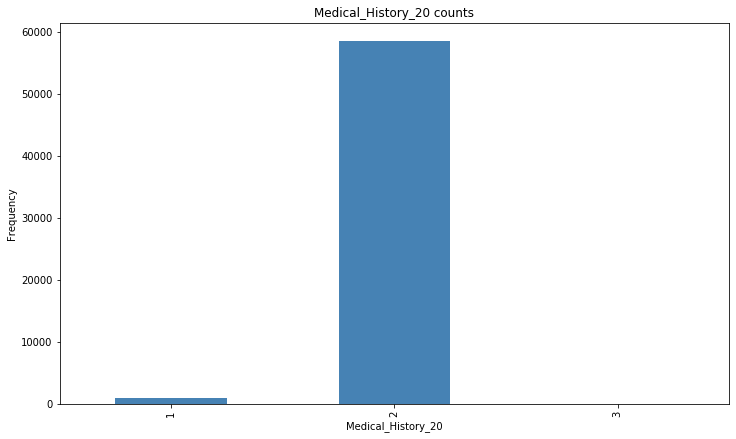

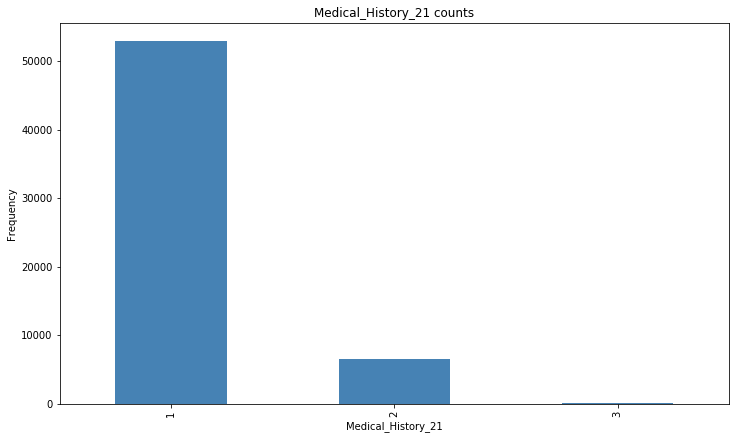

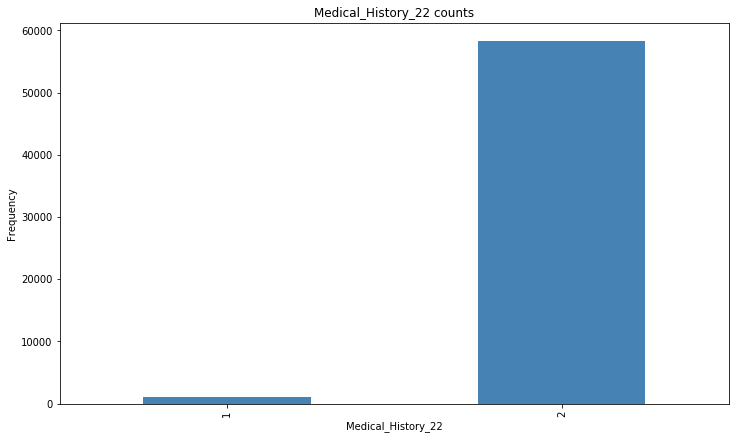

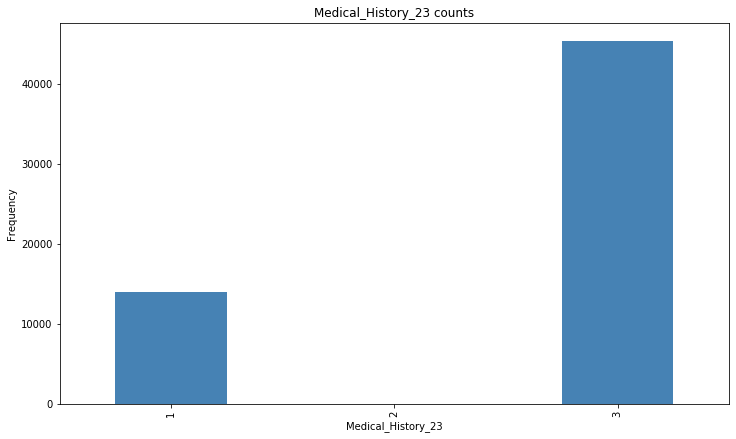

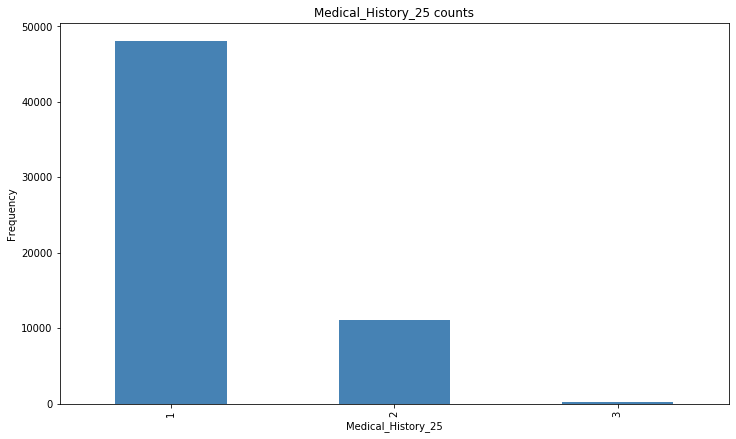

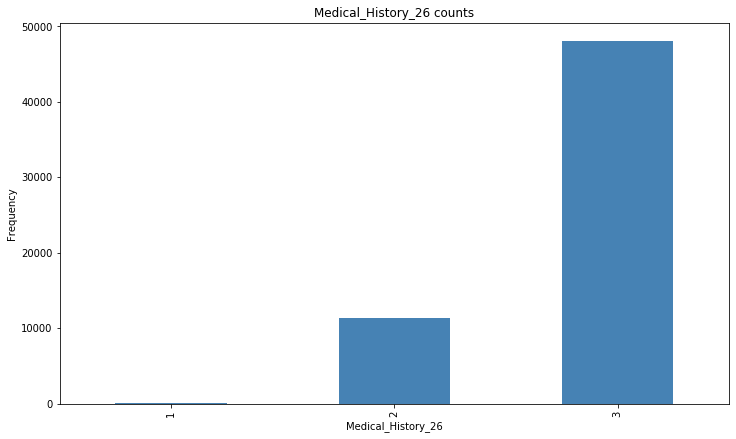

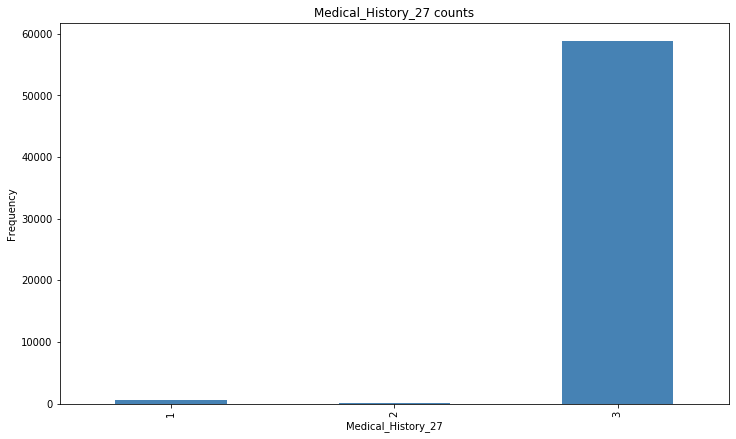

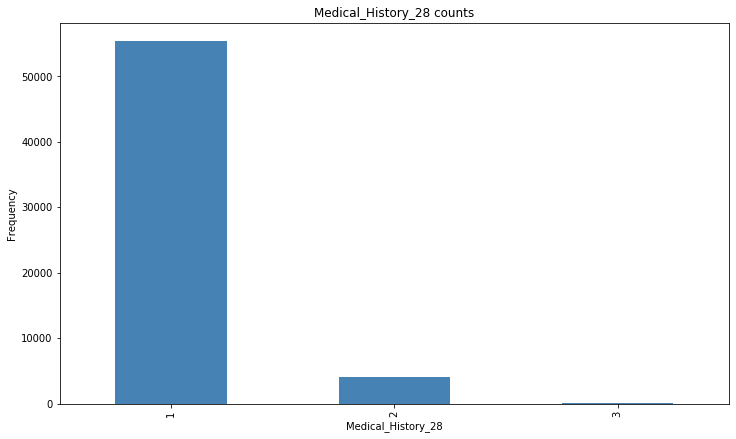

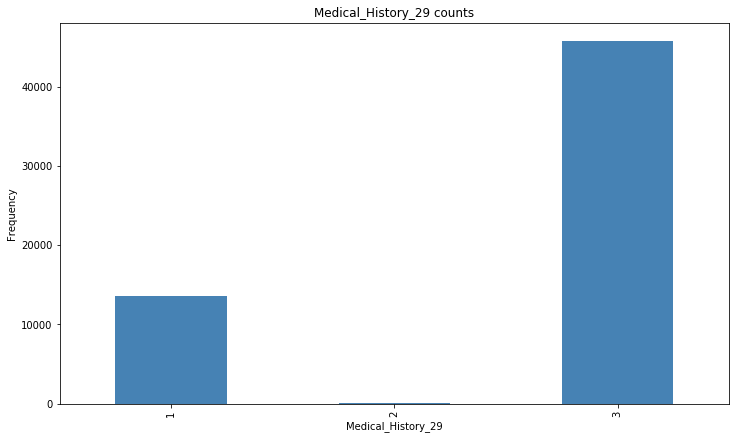

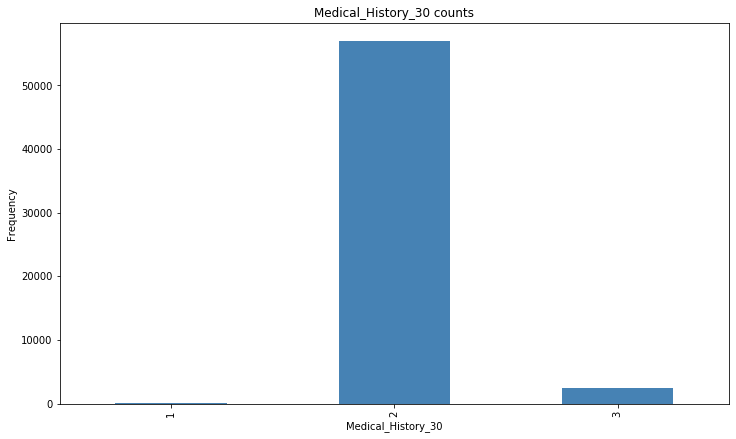

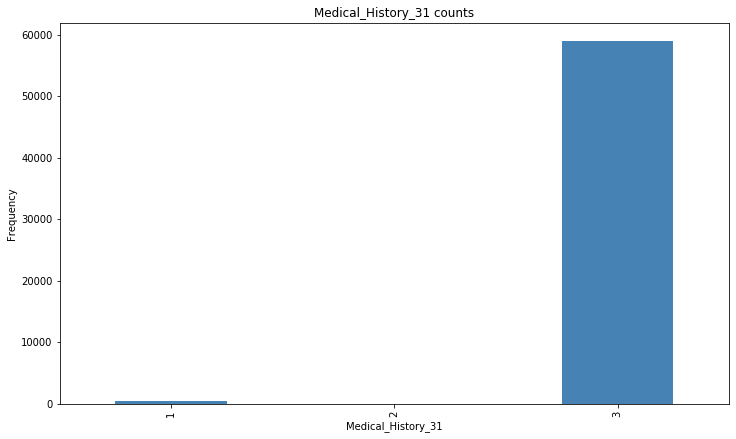

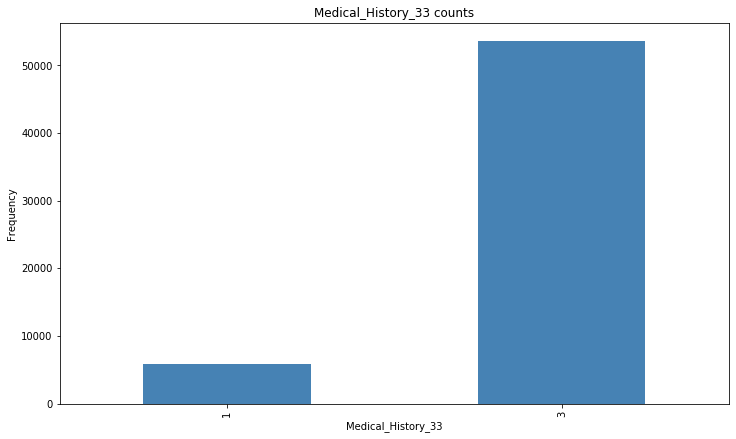

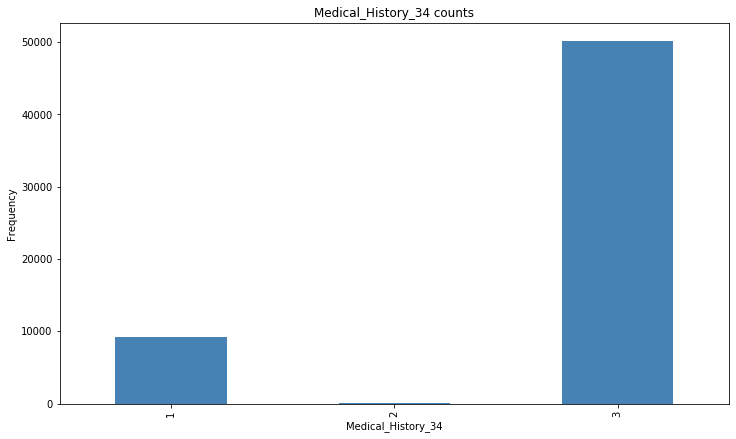

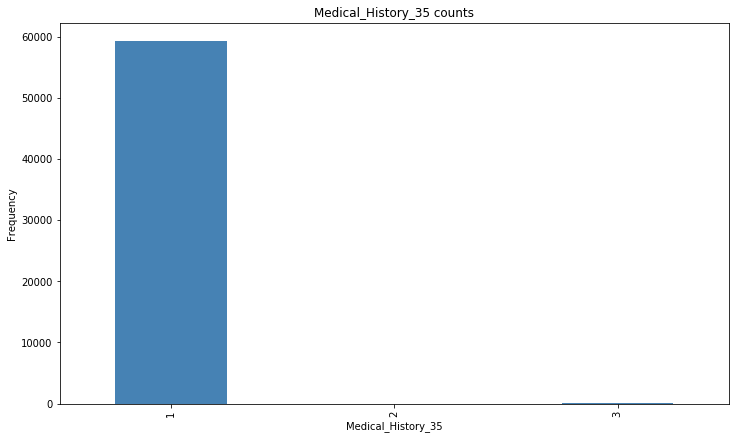

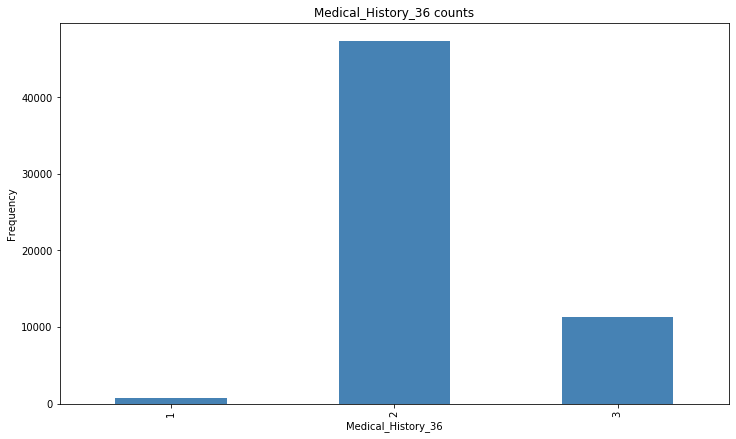

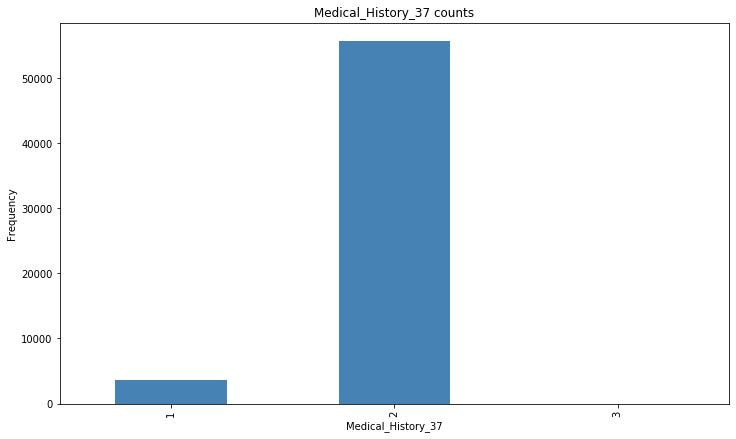

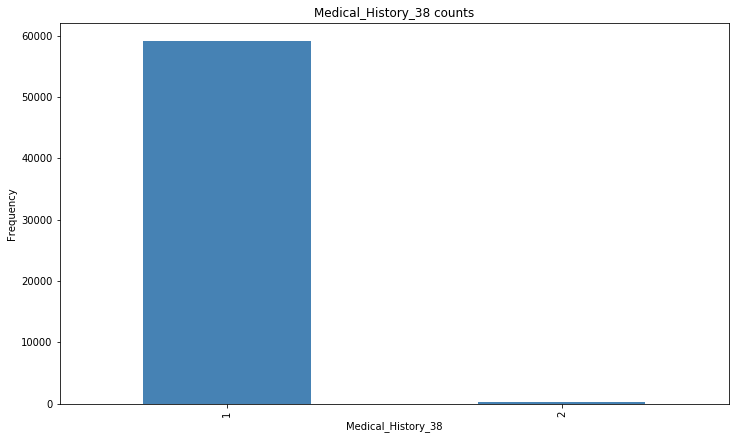

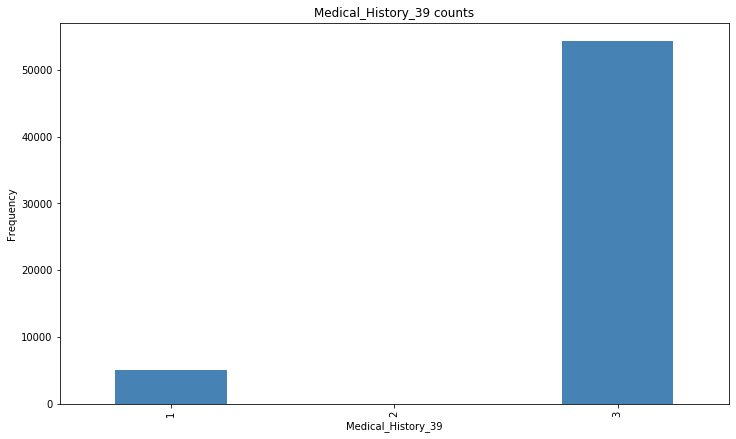

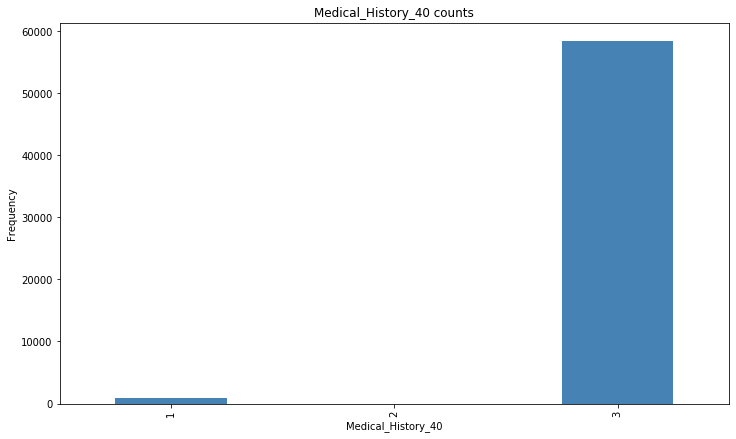

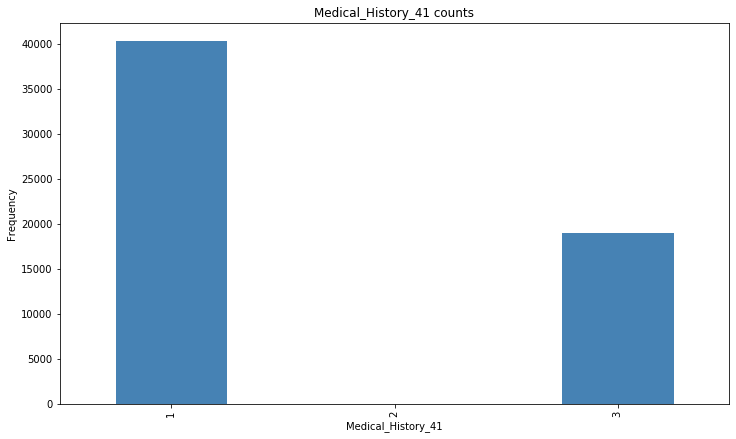

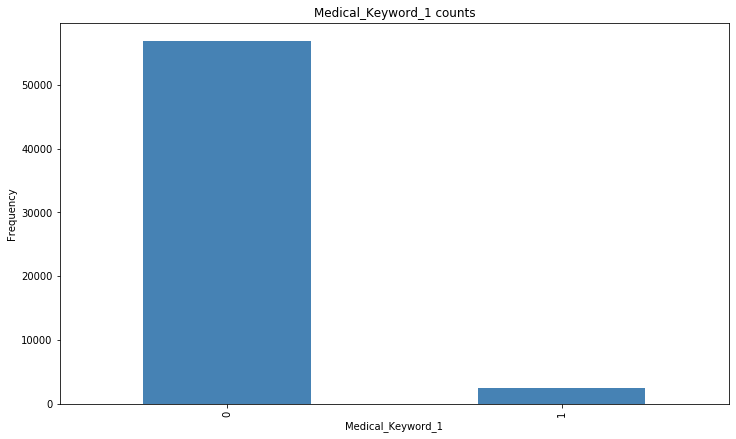

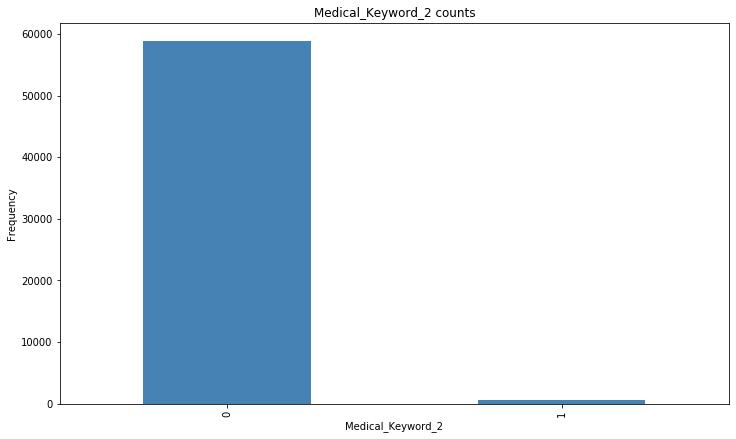

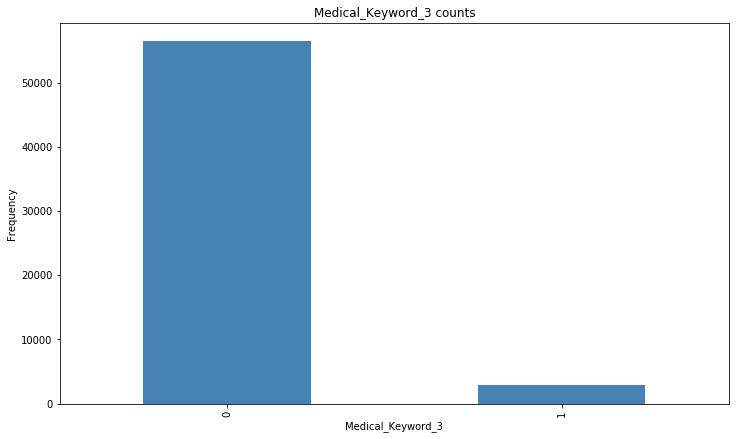

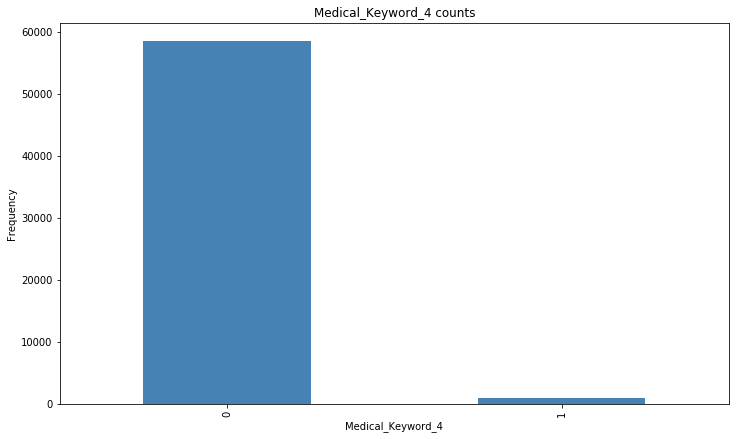

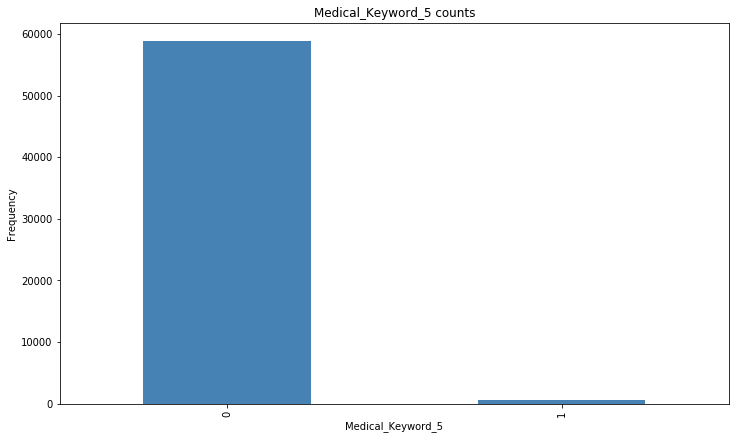

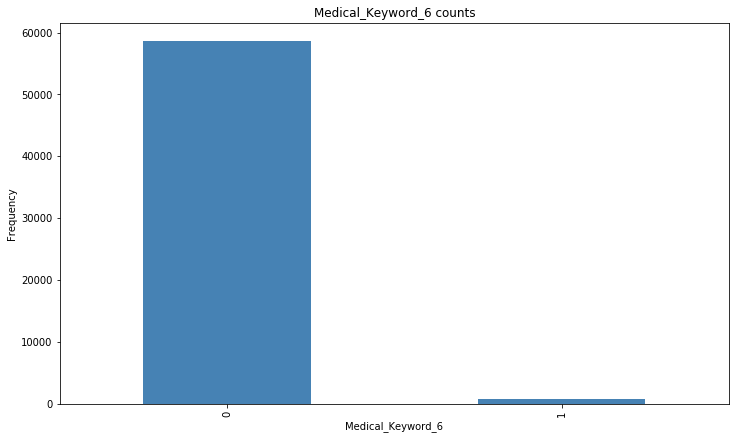

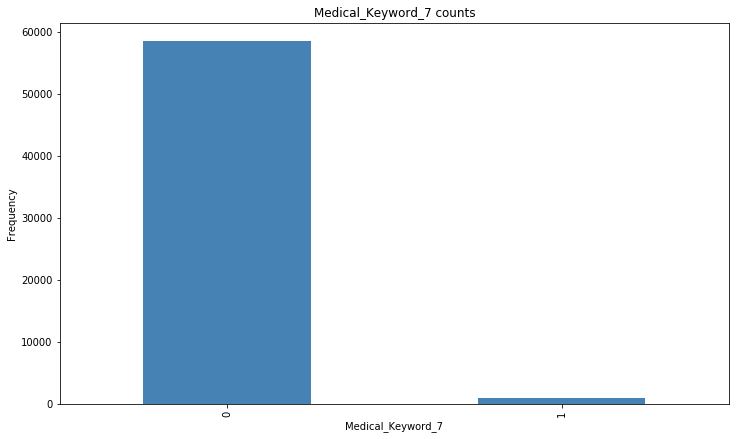

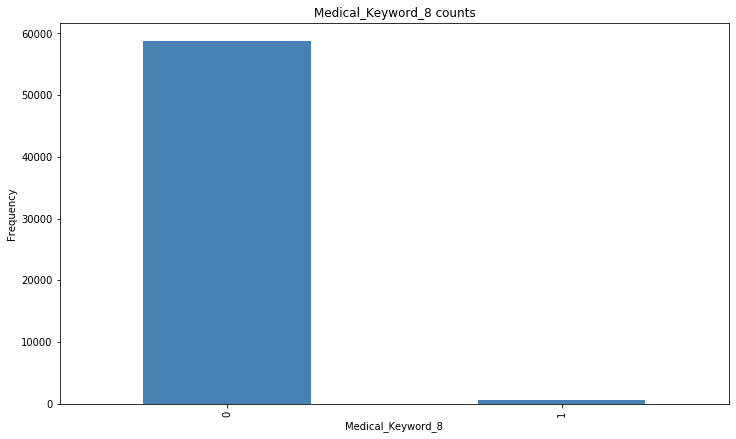

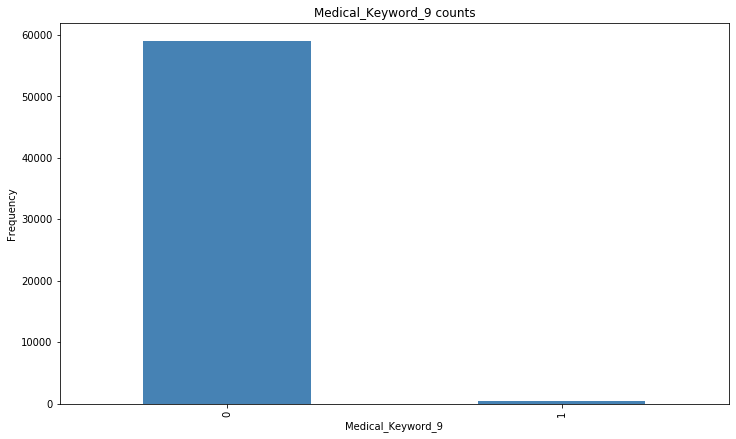

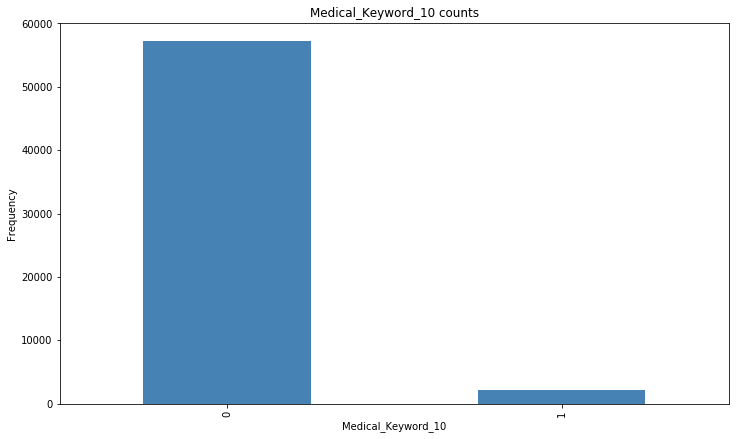

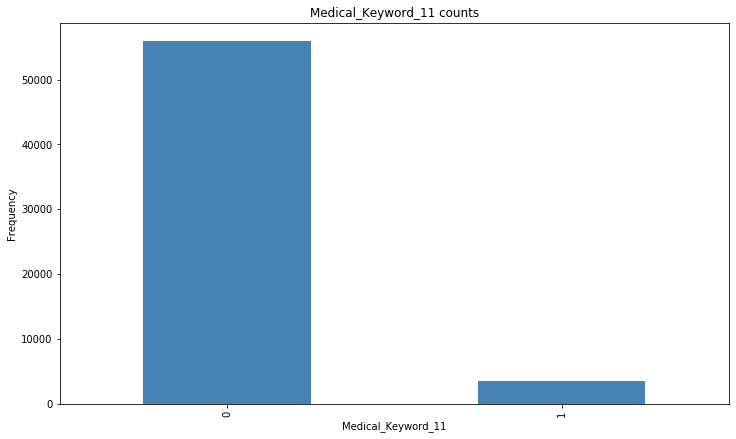

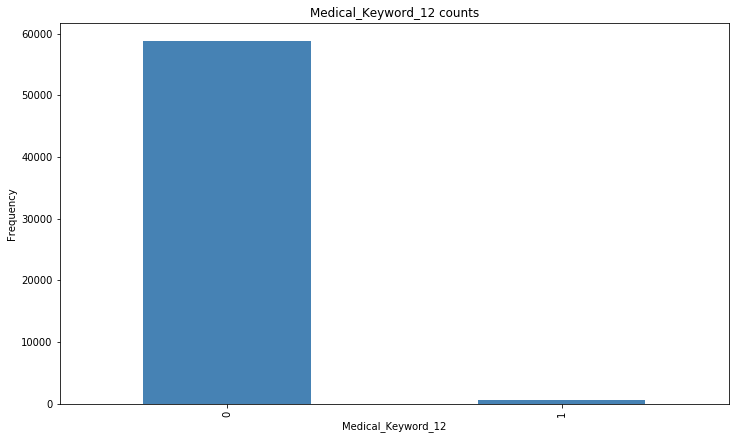

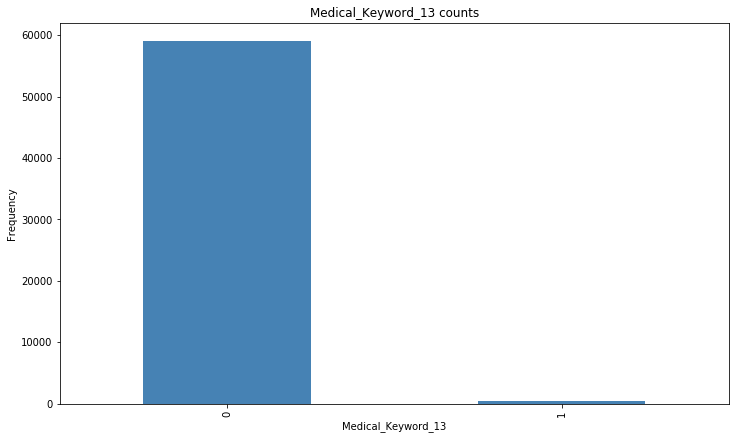

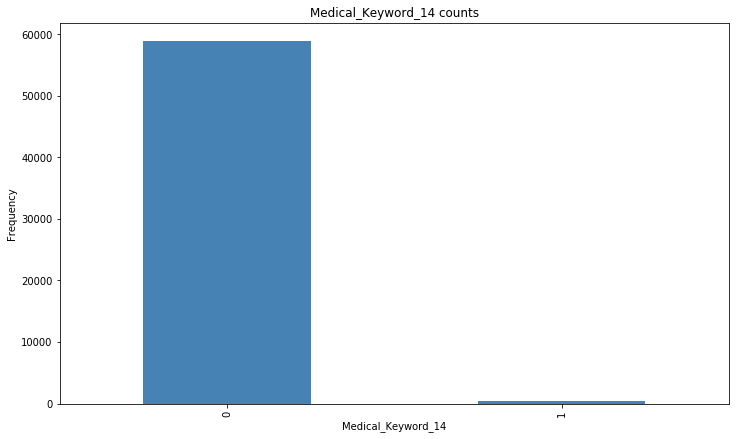

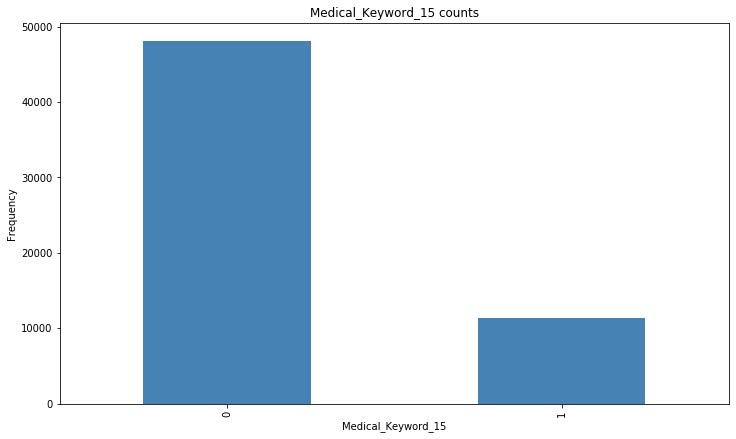

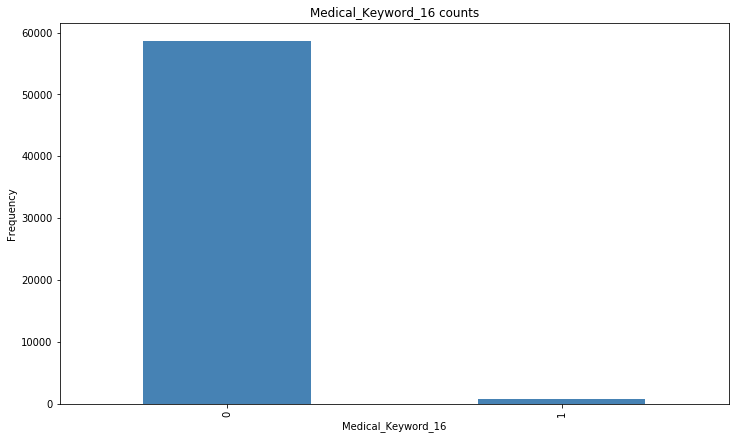

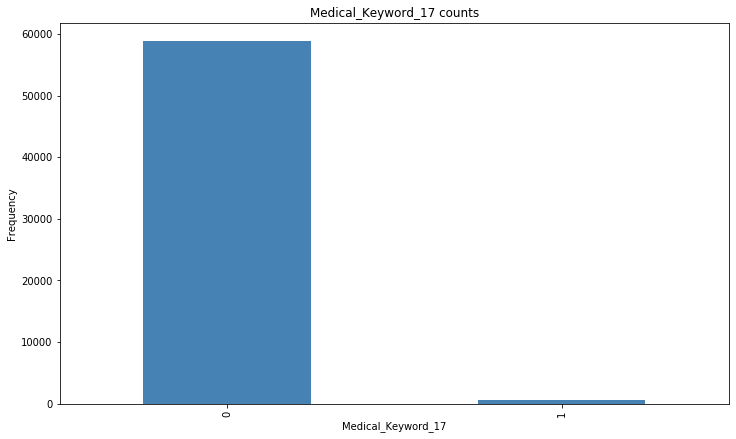

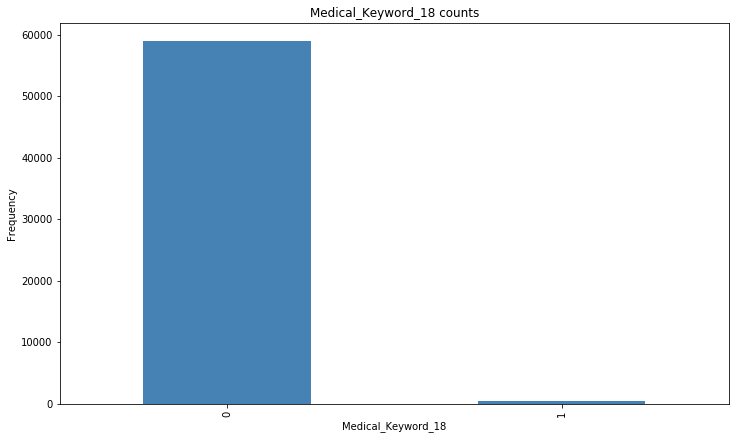

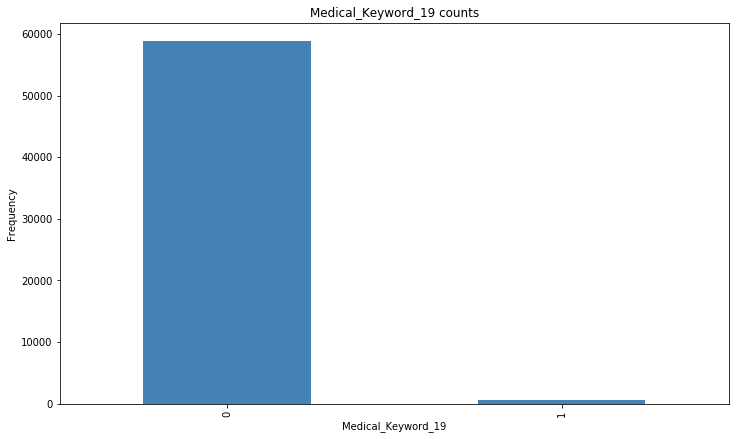

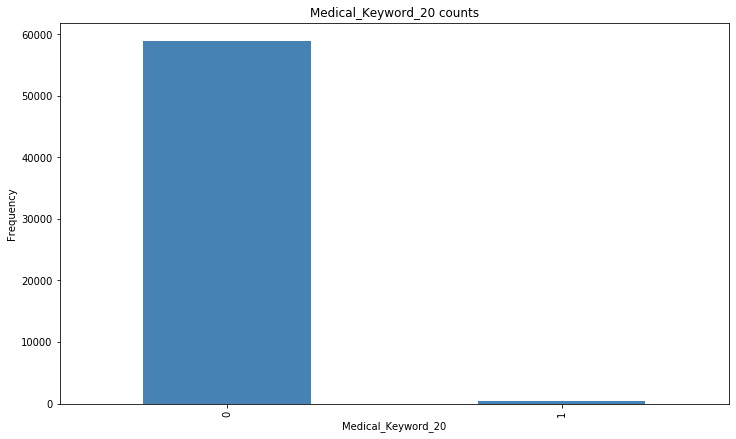

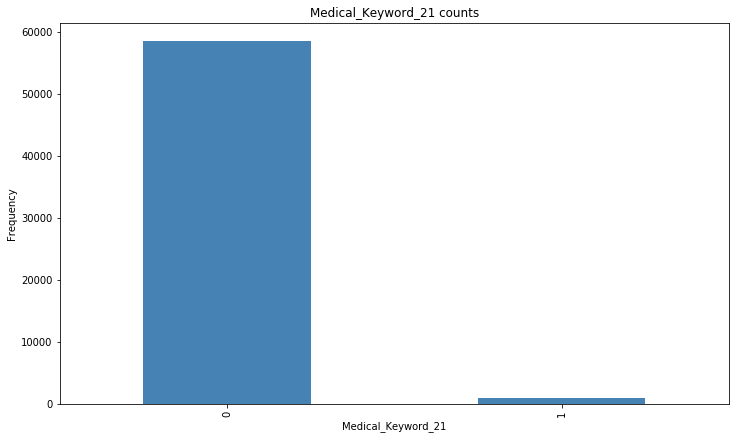

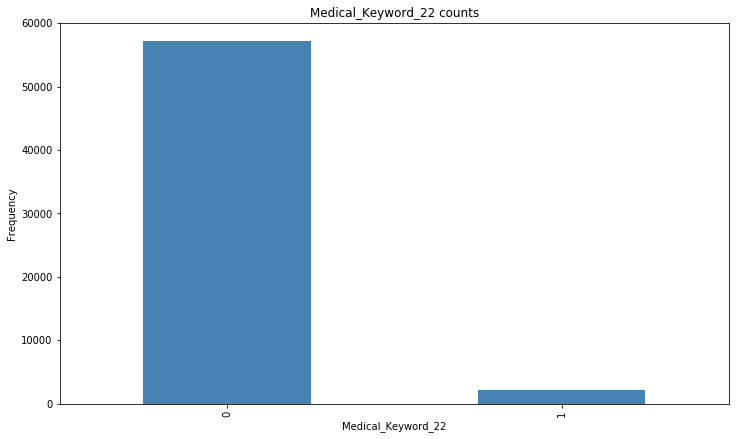

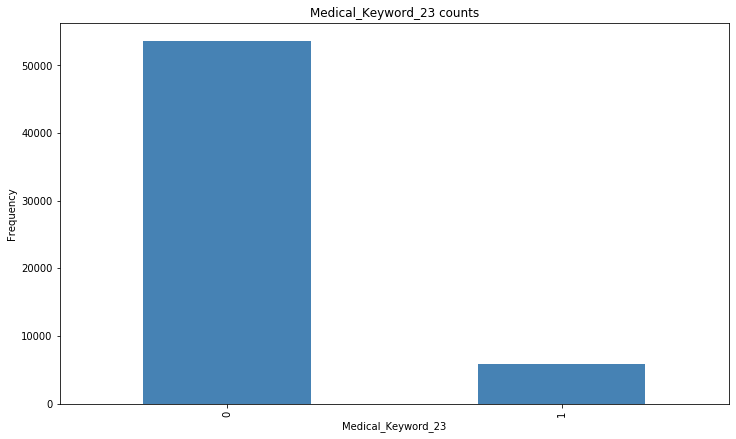

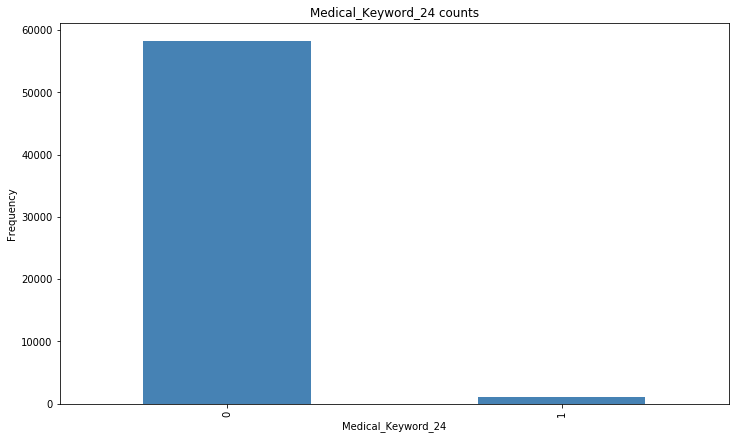

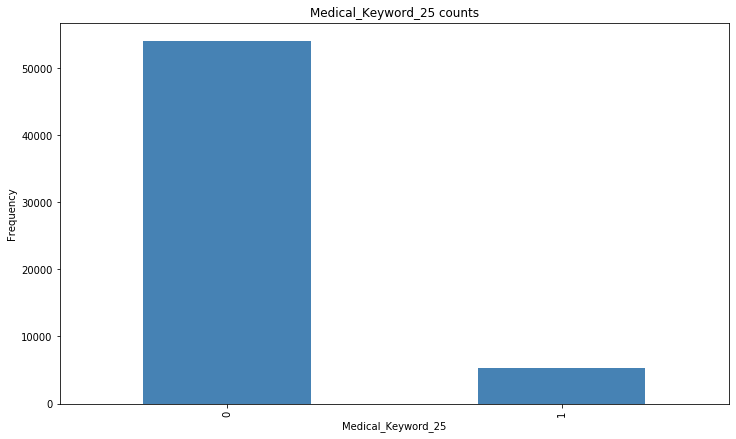

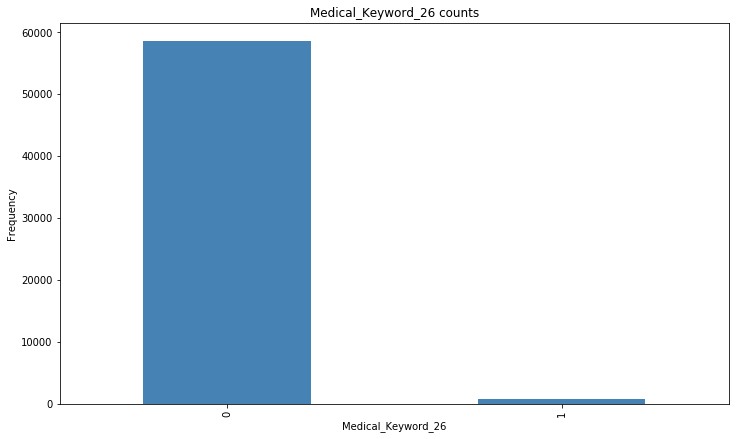

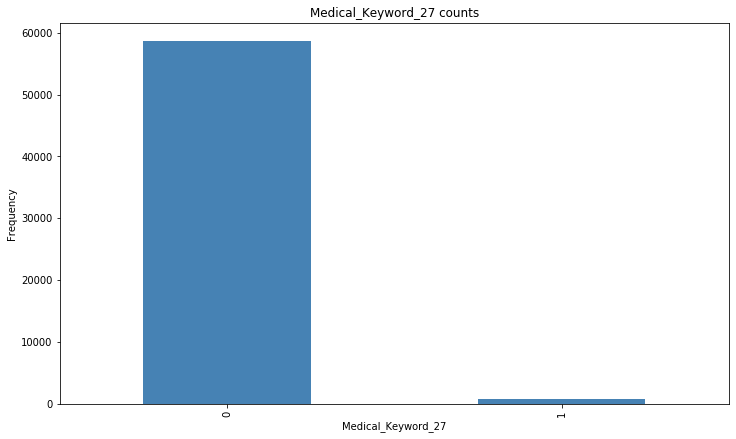

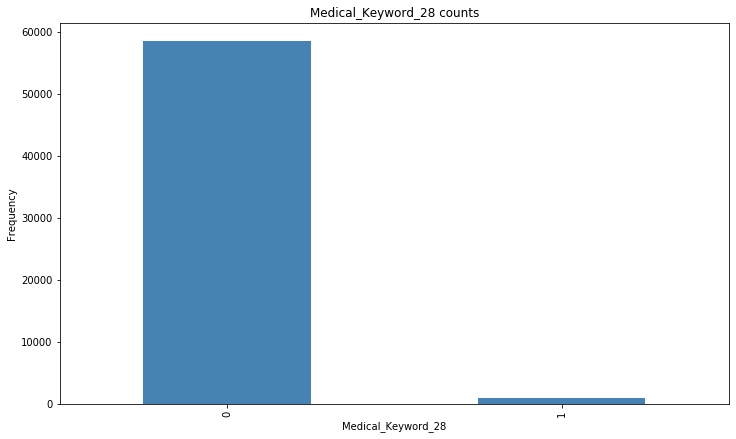

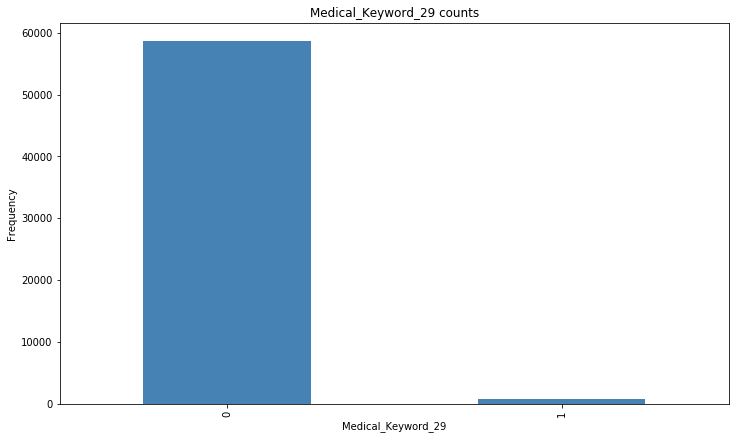

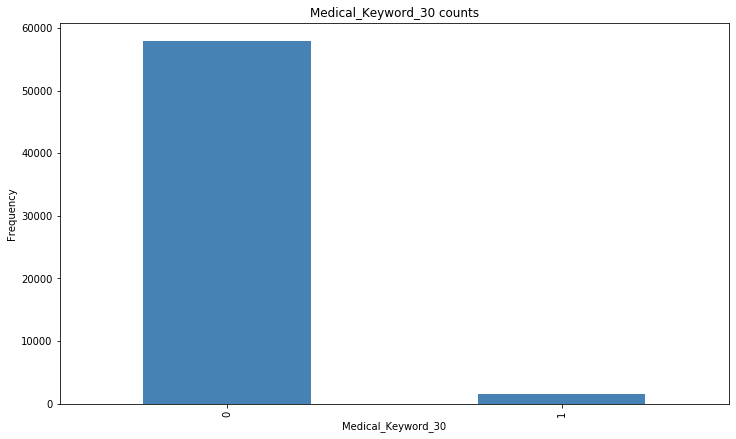

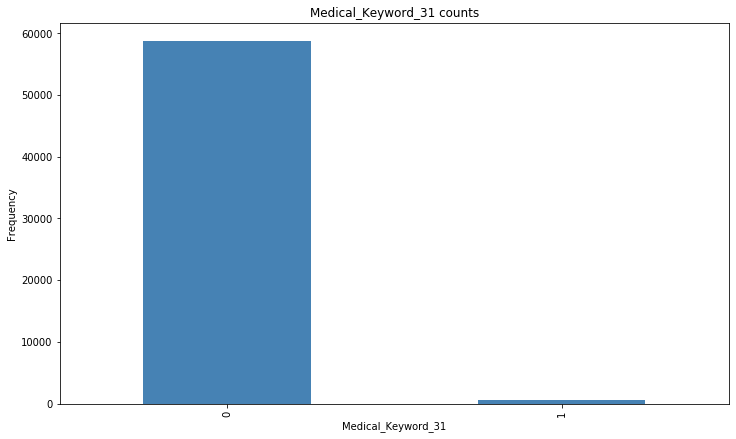

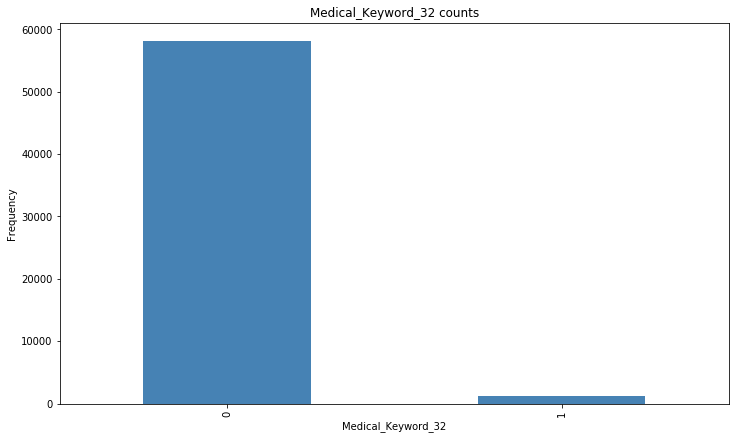

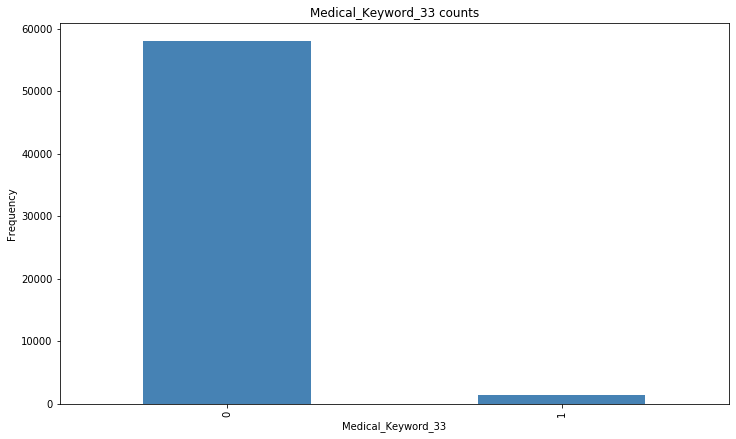

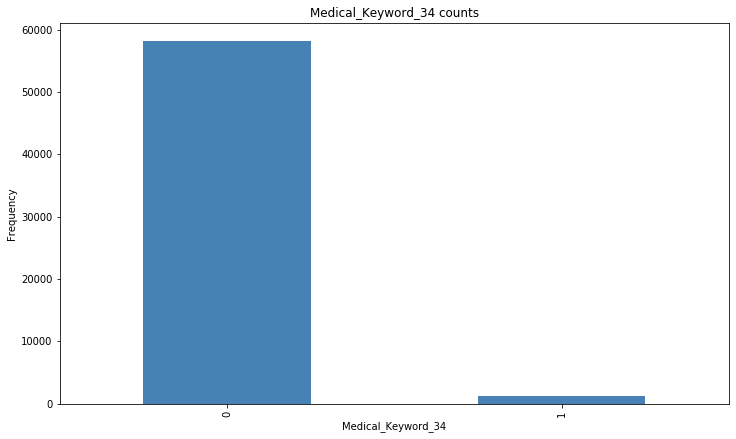

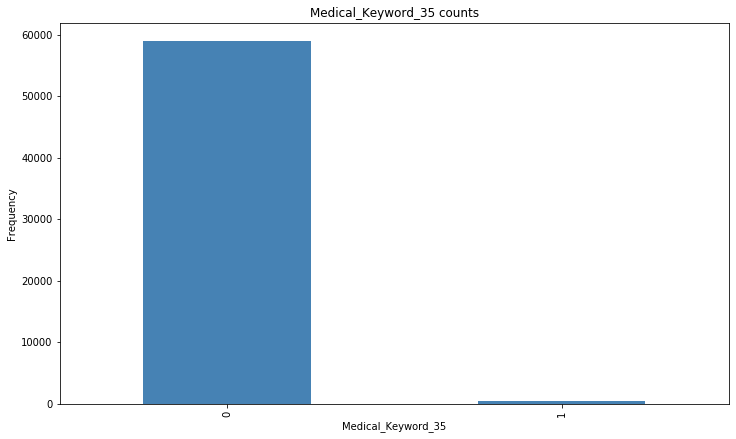

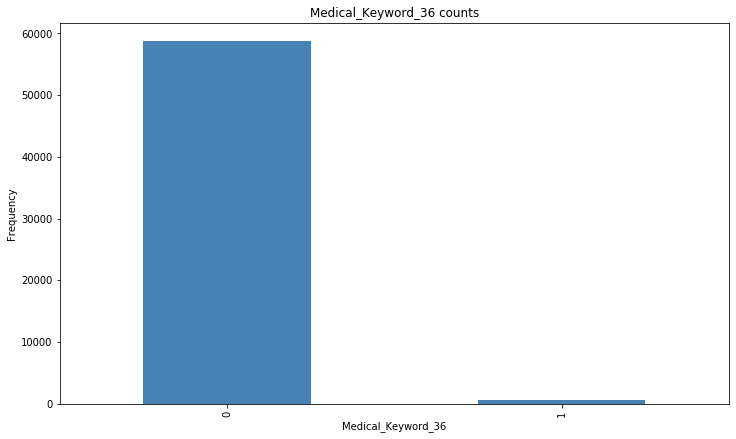

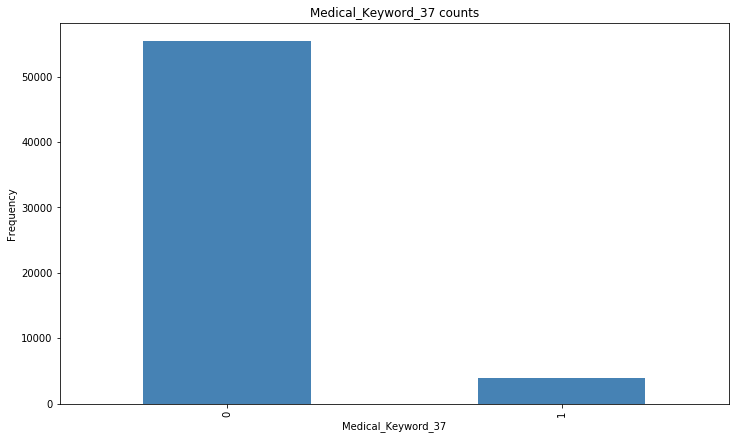

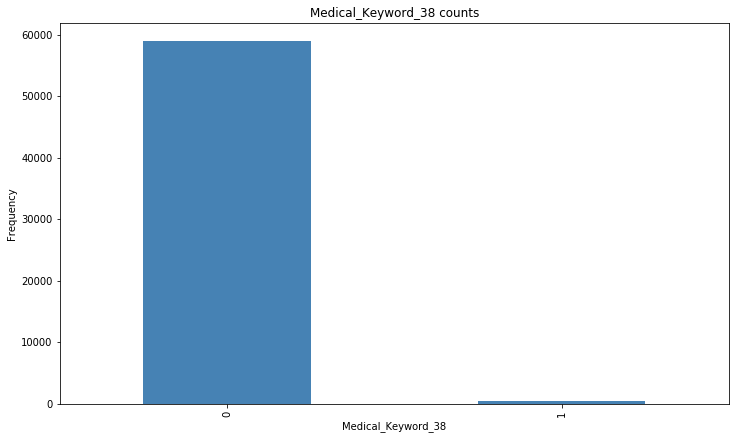

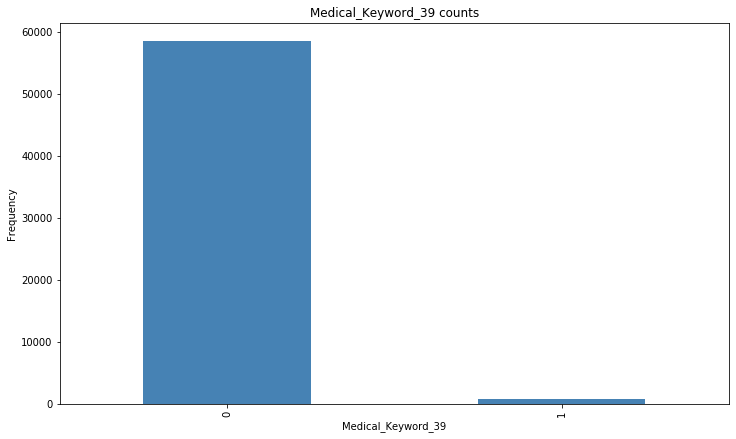

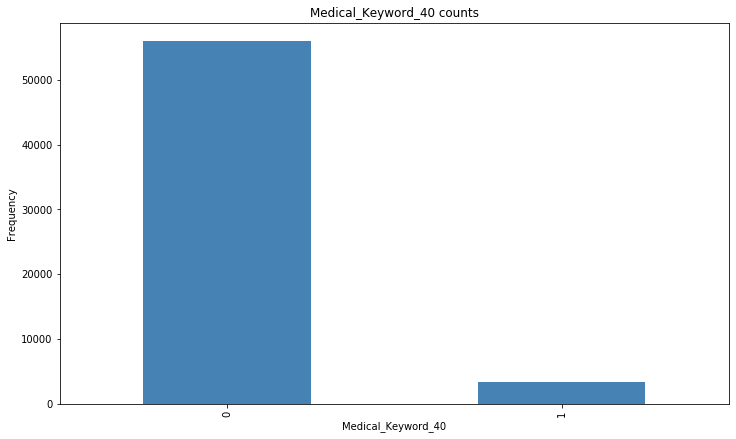

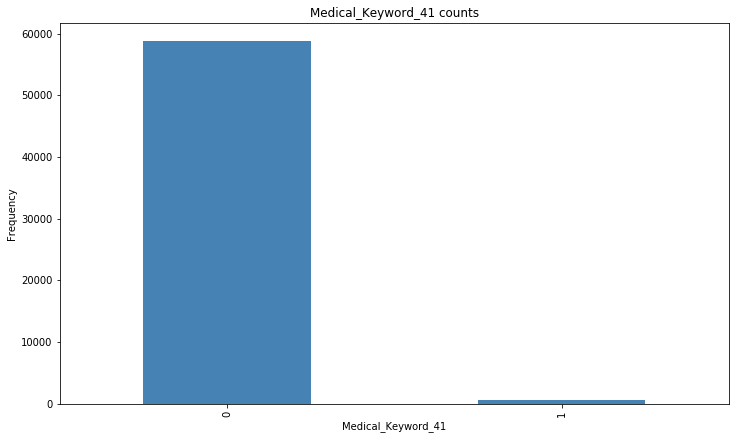

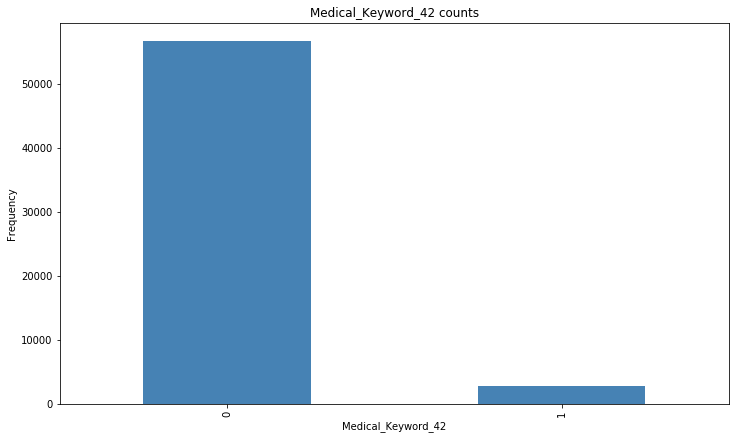

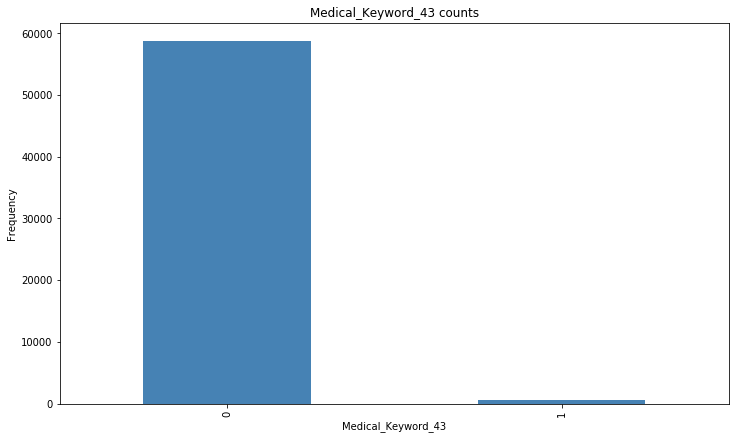

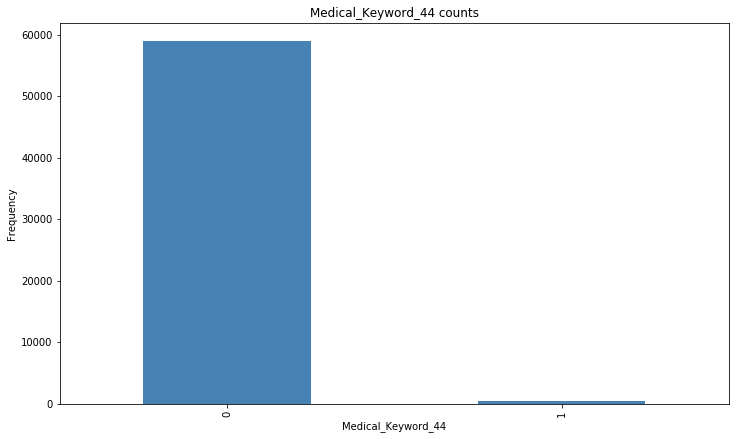

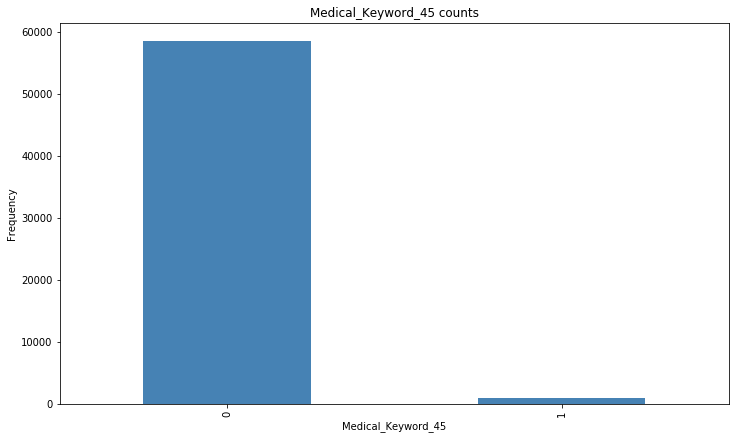

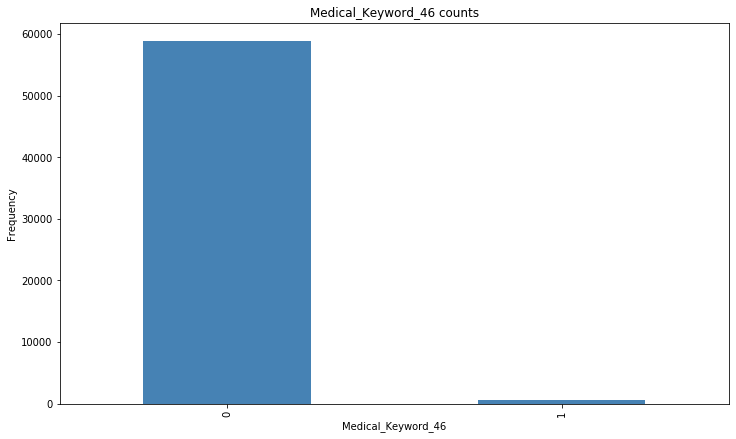

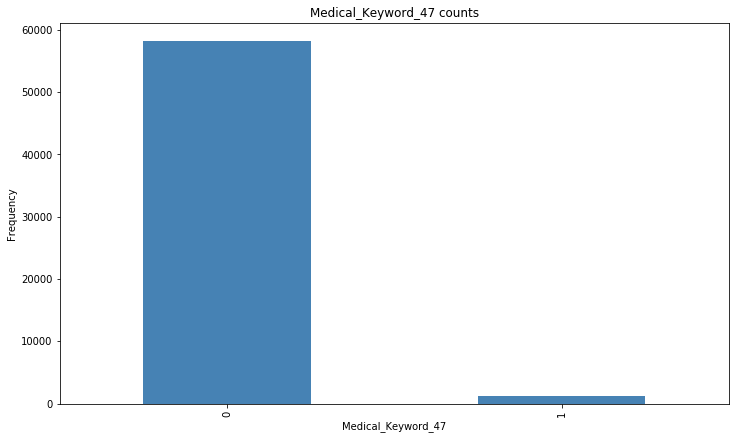

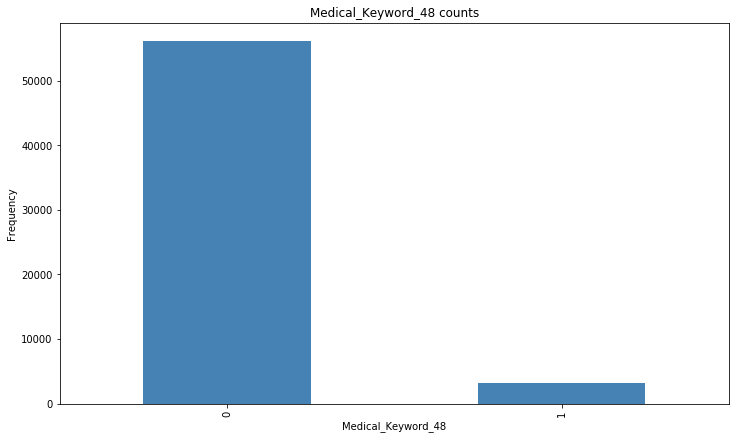

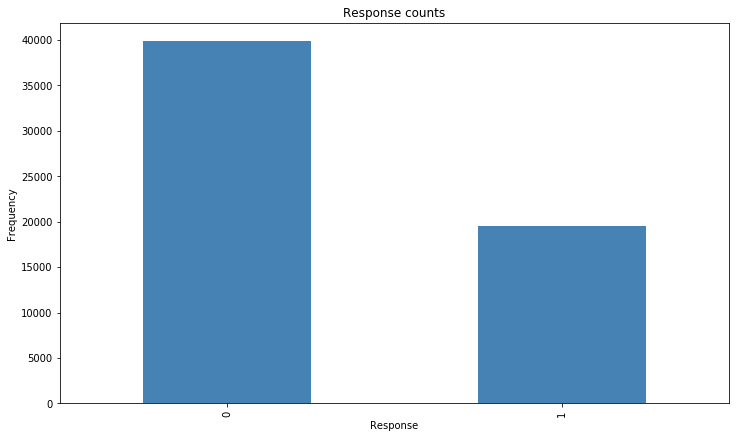

In [11]:
for col in train_data.columns:
    counts = train_data[col].value_counts().sort_index()
    if len(counts) >50 :
        continue
    else:
        fig = plt.figure(figsize=(12, 7))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [12]:
train_data_corr = train_data.corr()
train_data_high = train_data_corr[train_data_corr >=.75]

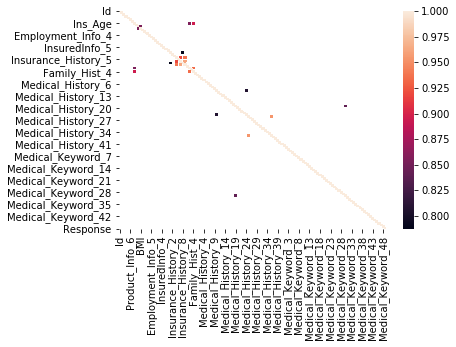

In [13]:
sns.heatmap(train_data_high)

In [14]:
null_value_list=[]
for i in range(len(train_data.columns)):
    null_value = train_data.isnull().sum().values[i]
    if null_value !=0:
        null_value_list.append(train_data.columns[i])
null_value_list

['Employment_Info_1',
 'Employment_Info_4',
 'Employment_Info_6',
 'Insurance_History_5',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_10',
 'Medical_History_15',
 'Medical_History_24',
 'Medical_History_32']

In [15]:
for i in null_value_list:
    train_data[i].fillna(train_data[i].mode()[0], inplace=True)

In [16]:
train_data.isnull().any()

Id                    False
Product_Info_1        False
Product_Info_2        False
Product_Info_3        False
Product_Info_4        False
                      ...  
Medical_Keyword_45    False
Medical_Keyword_46    False
Medical_Keyword_47    False
Medical_Keyword_48    False
Response              False
Length: 128, dtype: bool

In [17]:
train_data.head(3)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,1
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,0
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,1


In [18]:
train_data_new = train_data.drop(['Product_Info_2'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split

X = train_data_new.drop(['Id', 'Response'], axis=1)
y = train_data_new['Response']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [20]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape )

(41566, 125) (41566,) (17815, 125) (17815,)


In [21]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    return mae, mse, rmse, r2_square

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train,y_train)
pred_log=model_log.predict(X_test)
log_score =model_log.score(X_train,y_train)
log_pred_score =round(log_score*100,2)
print(log_pred_score)

72.27


In [24]:
MAE_log, MSE_log, RMSE_log, R2_log = print_evaluate(y_test,pred_log)

MAE: 0.2851529609879315
MSE: 0.2851529609879315
RMSE: 0.5339971544755004
R2 Square -0.29137189681878617


In [25]:
train_log = model_log.predict_proba(X_train)[:, 1]
test_log = model_log.predict_proba(X_test)[:, 1]
roc_auc_score_train_log = roc_auc_score(y_train,train_log)
roc_auc_score_test_log = roc_auc_score(y_test,test_log)

## XGBoost

In [26]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, np.ravel(y_train))

predict_xgb = xgb_model.predict_proba(X_test)
predict_xgb_prob = pd.DataFrame(predict_xgb[:,1],columns = ['Default Probability'])
xgb_probability = pd.concat([predict_xgb_prob, y_test.reset_index(drop=True)],axis=1)
xgb_probability.head()

[14:57:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Default Probability,Response
0,0.691941,0
1,0.000668,0
2,0.001226,0
3,0.035522,0
4,0.834926,1


In [27]:
feat_importance = xgb_model.get_booster().get_score(importance_type='weight')
feature_importance_rank = dict(sorted(feat_importance.items(), key=lambda item: item[1], reverse=True))
feature_importance_rank 

{'BMI': 314.0,
 'Ins_Age': 243.0,
 'Employment_Info_1': 225.0,
 'Wt': 207.0,
 'Medical_History_1': 175.0,
 'Medical_History_2': 173.0,
 'Product_Info_4': 167.0,
 'Employment_Info_6': 133.0,
 'Family_Hist_4': 117.0,
 'Insurance_History_5': 116.0,
 'Ht': 114.0,
 'Family_Hist_3': 113.0,
 'Family_Hist_2': 105.0,
 'Medical_History_15': 99.0,
 'Family_Hist_5': 87.0,
 'InsuredInfo_3': 77.0,
 'Employment_Info_4': 49.0,
 'Employment_Info_2': 44.0,
 'InsuredInfo_6': 39.0,
 'Medical_History_4': 39.0,
 'Family_Hist_1': 38.0,
 'Insurance_History_8': 32.0,
 'Medical_History_24': 31.0,
 'Product_Info_3': 29.0,
 'InsuredInfo_1': 29.0,
 'Medical_Keyword_15': 28.0,
 'Medical_History_9': 24.0,
 'Medical_History_23': 22.0,
 'Medical_History_32': 20.0,
 'Product_Info_6': 19.0,
 'Medical_History_16': 18.0,
 'Medical_Keyword_3': 17.0,
 'Medical_History_25': 16.0,
 'InsuredInfo_4': 15.0,
 'Medical_History_29': 15.0,
 'Medical_History_30': 15.0,
 'Medical_History_39': 15.0,
 'Medical_Keyword_20': 15.0,
 'Insur

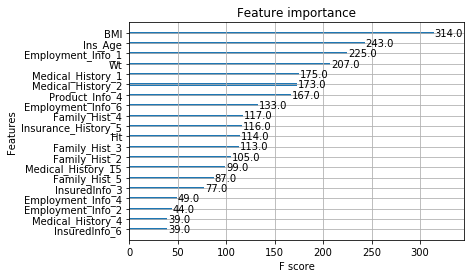

In [28]:
xgb.plot_importance(xgb_model,importance_type='weight', max_num_features=20)

In [29]:
pred_xgb=xgb_model.predict(X_test)
xgb_score =xgb_model.score(X_train,y_train)
xgb_pred_score =round(xgb_score*100,2)
print(xgb_pred_score)

89.47


In [30]:
MAE_xgb, MSE_xgb, RMSE_xgb, R2_xgb = print_evaluate(y_test,pred_xgb)

MAE: 0.16289643558798766
MSE: 0.16289643558798766
RMSE: 0.4036043057104169
R2 Square 0.2622910935889533


In [31]:
train_xgb = xgb_model.predict_proba(X_train)[:, 1]
test_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_score_train_xgb = roc_auc_score(y_train,train_xgb)
roc_auc_score_test_xgb = roc_auc_score(y_test,test_xgb)

## Catboost

In [32]:
import catboost as cat

model_catboost = cat.CatBoostClassifier(iterations=10000,learning_rate=0.005,eval_metric='Recall')
model_catboost.fit(X_train,y_train, early_stopping_rounds=1000, verbose=1000)

0:	learn: 0.7492844	total: 94ms	remaining: 15m 39s
1000:	learn: 0.7845138	total: 19.1s	remaining: 2m 52s
2000:	learn: 0.8023486	total: 37.5s	remaining: 2m 29s
3000:	learn: 0.8179083	total: 1m	remaining: 2m 20s
4000:	learn: 0.8276697	total: 1m 34s	remaining: 2m 21s
5000:	learn: 0.8353028	total: 1m 56s	remaining: 1m 55s
6000:	learn: 0.8414679	total: 2m 20s	remaining: 1m 33s
7000:	learn: 0.8474128	total: 2m 45s	remaining: 1m 10s
8000:	learn: 0.8536514	total: 3m 7s	remaining: 46.8s
9000:	learn: 0.8602569	total: 3m 25s	remaining: 22.8s
9999:	learn: 0.8650275	total: 3m 42s	remaining: 0us


In [33]:
pred_catboost=model_catboost.predict(X_test)
catboost_score =model_catboost.score(X_test,y_test)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

83.91

In [34]:
MAE_catboost, MSE_catboost, RMSE_catboost, R2_catboost = print_evaluate(y_test,pred_catboost)

MAE: 0.16093179904574798
MSE: 0.16093179904574798
RMSE: 0.40116305792750656
R2 Square 0.2711883409095551


In [35]:
train_catboost = model_catboost.predict_proba(X_train)[:, 1]
test_catboost = model_catboost.predict_proba(X_test)[:, 1]
roc_auc_score_train_catboost = roc_auc_score(y_train,train_catboost)
roc_auc_score_test_catboost = roc_auc_score(y_test,test_catboost)

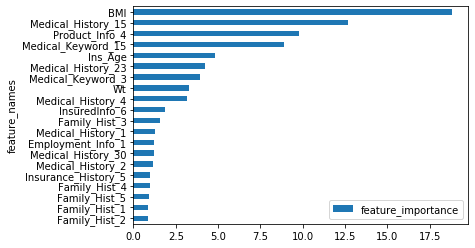

In [36]:
#https://stackoverflow.com/questions/64988694/how-can-i-get-the-feature-importance-of-a-catboost-in-a-pandas-dataframe
catboost_feature_df = pd.DataFrame({'feature_importance': model_catboost.get_feature_importance(), 
                              'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                                       ascending=False)
catboost_feature_df[:20].sort_values(by=['feature_importance'], ascending=True).plot.barh(x='feature_names', y='feature_importance')

In [37]:
from sklearn.metrics import classification_report

print('XGBoost')
print(classification_report(y_test,pred_xgb))

print('CatBoost')
print(classification_report(y_test,pred_catboost))

XGBoost
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     11951
           1       0.74      0.79      0.76      5864

    accuracy                           0.84     17815
   macro avg       0.81      0.82      0.82     17815
weighted avg       0.84      0.84      0.84     17815

CatBoost
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11951
           1       0.74      0.78      0.76      5864

    accuracy                           0.84     17815
   macro avg       0.82      0.83      0.82     17815
weighted avg       0.84      0.84      0.84     17815



In [38]:
Score_data = [('Logistic Regression', log_pred_score, MAE_log, MSE_log, RMSE_log, R2_log, roc_auc_score_train_log, roc_auc_score_test_log),
              ('XGBoost', xgb_pred_score, MAE_xgb, MSE_xgb, RMSE_xgb, R2_xgb, roc_auc_score_train_xgb, roc_auc_score_test_xgb),
              ('CatBoost', catboost_pred_score, MAE_catboost, MSE_catboost, RMSE_catboost, R2_catboost, roc_auc_score_train_catboost, roc_auc_score_test_catboost)
             ]
Score_df = pd.DataFrame(data= Score_data, columns = ['Model', 'Prediction Score', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'ROC AUC Train', 'ROC AUC Test'])
Score_df.set_index('Model', inplace=True)
Score_df

,Prediction Score,MAE,MSE,RMSE,R2 Square,ROC AUC Train,ROC AUC Test
Model,,,,,,,
Logistic Regression,72.27,0.285153,0.285153,0.533997,-0.291372,0.784570,0.776955
XGBoost,89.47,0.162896,0.162896,0.403604,0.262291,0.959459,0.916114
CatBoost,83.91,0.160932,0.160932,0.401163,0.271188,0.953896,0.918422


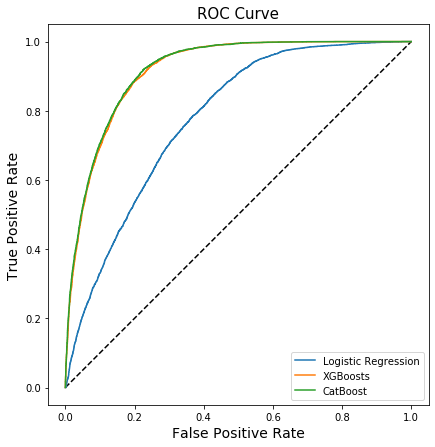

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')

model_log_proba=model_log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_log_proba)
plt.plot(fpr, tpr, label='Logistic Regression')


xgb_model_proba=xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,xgb_model_proba)
plt.plot(fpr, tpr, label='XGBoosts')

model_catboost_proba=model_catboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_catboost_proba)
plt.plot(fpr, tpr, label='CatBoost')

plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)
plt.legend()

## Conclusion
- CatBoost and XGBoost performs very well
- For CatBoost, BMI, Age, Employment Info 1, Weight, and Medical History 1 are the most importance feature
- For XGBoost, BMI, Medical_History_15, Product_Info_4, Medical_Keyword_15, Age are the most importance feature
- BMI is the most importance feature